In [1]:
import scanpy as sc
from sklearn.metrics import f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

In [27]:
res_methods = {
    "method": [],
    "f1_score": [],
    "fn": [],
    "fp": [],
    "tn": [],
    "tp": [],
}
mappings = {'Singlet': 0, "Doublet": 1}

res_image_based = sc.read_h5ad("./expression/results/image-based/adata_img5_wPreds.h5ad")
res_image_based = res_image_based[res_image_based.obs["class"].notnull() & 
                                  (res_image_based.obs["class"] != "Missing") &
                                  (res_image_based.obs["difficult"] == False)]
res_image_based.obs.loc[res_image_based.obs["pred_image_class"] == "Missing", "pred_image_class"] = "Singlet"
res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)
res_image_based.obs["pred_image_class"] = res_image_based.obs["pred_image_class"].map(mappings)
f1_image_based = f1_score(res_image_based.obs["class"], res_image_based.obs["pred_image_class"])
res_methods["method"].append("ImageDoubler")
res_methods["f1_score"].append(f1_image_based)
tn, fp, fn, tp = confusion_matrix(res_image_based.obs["class"], res_image_based.obs["pred_image_class"]).ravel()
res_methods["fn"].append(fn)
res_methods["fp"].append(fp)
res_methods["tn"].append(tn)
res_methods["tp"].append(tp)

res_image_based = sc.read_h5ad("./expression/results/image-based/adata_img5_wPreds_fromloocv.h5ad")
res_image_based = res_image_based[res_image_based.obs["class"].notnull() & 
                                  (res_image_based.obs["class"] != "Missing") &
                                  (res_image_based.obs["difficult"] == False)]
res_image_based.obs.loc[res_image_based.obs["pred_image_class"] == "Missing", "pred_image_class"] = "Singlet"
res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)
res_image_based.obs["pred_image_class"] = res_image_based.obs["pred_image_class"].map(mappings)
f1_image_based = f1_score(res_image_based.obs["class"], res_image_based.obs["pred_image_class"])
res_methods["method"].append("ImageDoubler-loocv")
res_methods["f1_score"].append(f1_image_based)
tn, fp, fn, tp = confusion_matrix(res_image_based.obs["class"], res_image_based.obs["pred_image_class"]).ravel()
res_methods["fn"].append(fn)
res_methods["fp"].append(fp)
res_methods["tn"].append(tn)
res_methods["tp"].append(tp)

evals = []
res_doubletdetection = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img5_noMissing.h5ad")
evals += [v for k, v in res_doubletdetection.uns.items() if k != "hvg"]
# res_doubletdetection = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img5.h5ad")
# evals += [v for k, v in res_doubletdetection.uns.items() if k != "hvg"]
f1s = [v["f1_score"] for v in evals]
f1_doubletdetection = np.max(f1s)
res_methods["method"].append("DoubletDetection")
res_methods["f1_score"].append(f1_doubletdetection)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

# evals = []
# res_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img5.h5ad")
# evals += [v for k, v in res_scrublet.uns.items() if k != "hvg"]

evals = []
res_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img5_noMissing.h5ad")
evals += [v for k, v in res_scrublet.uns.items() if k != "hvg"]
f1s = [v["f1_score"] for v in evals]
f1_scrublet = np.max(f1s)
res_methods["method"].append("Scrublet")
res_methods["f1_score"].append(f1_scrublet)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

evals = []
# res_solo = sc.read_h5ad("./expression/results/solo/solo_img5.h5ad")
# evals += [v for k, v in res_solo.uns.items() if k != "hvg" and isinstance(v, dict)]
res_solo = sc.read_h5ad("./expression/results/solo/solo_img5_noMissing.h5ad")
evals += [v for k, v in res_solo.uns.items() if k != "hvg" and isinstance(v, dict)]
f1s = [v["f1_score"] for v in evals]
f1_solo = np.max(f1s)
res_methods["method"].append("Solo")
res_methods["f1_score"].append(f1_solo)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

evals = []
res_socube = sc.read_h5ad("./expression/results/socube/socube_img5_noMissing.h5ad")
evals += [v for k, v in res_socube.uns.items()]
f1s = [v["f1_score"] for v in evals]
f1_socube = np.max(f1s)
res_methods["method"].append("SoCube")
res_methods["f1_score"].append(f1_socube)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

/tmp/ipykernel_36892/2579154015.py:16: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)
/tmp/ipykernel_36892/2579154015.py:32: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)


In [28]:
res_scDblFinder = pd.read_csv("./expression/results/scDblFinder/scDblFinder/scores.csv", index_col=0)
idx = [i for i in res_scDblFinder.index if "img5" in i and "noMissing" in i]
f1_scDblFinder = res_scDblFinder.loc[idx, "f1"].max()
res_methods["method"].append("scDblFinder")
res_methods["f1_score"].append(f1_scDblFinder)
res_methods["fn"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "fn"].values[0])
res_methods["fp"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "fp"].values[0])
res_methods["tn"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "tn"].values[0])
res_methods["tp"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "tp"].values[0])

res_scds = pd.read_csv("./expression/results/scds/scds/scores.csv", index_col=0)
idx = [i for i in res_scds.index if "img5" in i and "noMissing" in i]
f1_scds = res_scds.loc[idx, "f1"].max()
res_methods["method"].append("scds")
res_methods["f1_score"].append(f1_scds)
res_methods["fn"].append(res_scds.loc[res_scds.f1 == f1_scds, "fn"].values[0])
res_methods["fp"].append(res_scds.loc[res_scds.f1 == f1_scds, "fp"].values[0])
res_methods["tn"].append(res_scds.loc[res_scds.f1 == f1_scds, "tn"].values[0])
res_methods["tp"].append(res_scds.loc[res_scds.f1 == f1_scds, "tp"].values[0])

res_doubletfinder = pd.read_csv("./expression/results/DoubletFinder/DoubletFinder/scores.csv", index_col=0)
idx = [i for i in res_doubletfinder.index if "img5" in i and "noMissing" in i]
f1_doubletfinder = res_doubletfinder.loc[idx, "f1"].max()
res_methods["method"].append("DoubletFinder")
res_methods["f1_score"].append(f1_doubletfinder)
res_methods["fn"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "fn"].values[0])
res_methods["fp"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "fp"].values[0])
res_methods["tn"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "tn"].values[0])
res_methods["tp"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "tp"].values[0])

In [30]:
res_methods = pd.DataFrame(res_methods).sort_values("f1_score", ascending=False)
res_methods.to_csv("./Figure4/res_methods_img5.csv", index=False)

/tmp/ipykernel_36892/183364325.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)


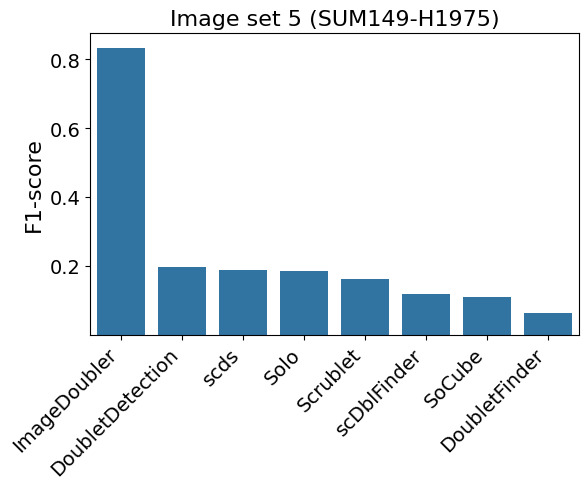

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
# reduce the bar width
sns.barplot(data=res_methods[res_methods.method != "ImageDoubler-loocv"], x="method", y="f1_score", ax=ax)
ax.set_ylabel("F1-score", fontsize=16)
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_title("Image set 5 (SUM149-H1975)", fontsize=16)
plt.tight_layout()
plt.savefig("Figure4/f1_scores_img5.png", dpi=300)

In [33]:
res_methods = {
    "method": [],
    "f1_score": [],
    "fn": [],
    "fp": [],
    "tn": [],
    "tp": [],
}
mappings = {'Singlet': 0, "Doublet": 1}

res_image_based = sc.read_h5ad("./expression/results/image-based/adata_img11_wPreds.h5ad")
res_image_based = res_image_based[res_image_based.obs["class"].notnull() & 
                                  (res_image_based.obs["class"] != "Missing") &
                                  (res_image_based.obs["difficult"] == False)]
res_image_based.obs.loc[res_image_based.obs["pred_image_class"] == "Missing", "pred_image_class"] = "Singlet"
res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)
res_image_based.obs["pred_image_class"] = res_image_based.obs["pred_image_class"].map(mappings)
f1_image_based = f1_score(res_image_based.obs["class"], res_image_based.obs["pred_image_class"])
res_methods["method"].append("ImageDoubler")
res_methods["f1_score"].append(f1_image_based)
tn, fp, fn, tp = confusion_matrix(res_image_based.obs["class"], res_image_based.obs["pred_image_class"]).ravel()
res_methods["fn"].append(fn)
res_methods["fp"].append(fp)
res_methods["tn"].append(tn)
res_methods["tp"].append(tp)

res_image_based = sc.read_h5ad("./expression/results/image-based/adata_img11_wPreds_fromloocv.h5ad")
res_image_based = res_image_based[res_image_based.obs["class"].notnull() & 
                                  (res_image_based.obs["class"] != "Missing") &
                                  (res_image_based.obs["difficult"] == False)]
res_image_based.obs.loc[res_image_based.obs["pred_image_class"] == "Missing", "pred_image_class"] = "Singlet"
res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)
res_image_based.obs["pred_image_class"] = res_image_based.obs["pred_image_class"].map(mappings)
f1_image_based = f1_score(res_image_based.obs["class"], res_image_based.obs["pred_image_class"])
res_methods["method"].append("ImageDoubler-loocv")
res_methods["f1_score"].append(f1_image_based)
tn, fp, fn, tp = confusion_matrix(res_image_based.obs["class"], res_image_based.obs["pred_image_class"]).ravel()
res_methods["fn"].append(fn)
res_methods["fp"].append(fp)
res_methods["tn"].append(tn)
res_methods["tp"].append(tp)

evals = []
res_doubletdetection = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img11_noMissing.h5ad")
evals += [v for k, v in res_doubletdetection.uns.items() if k != "hvg"]
# res_doubletdetection = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img11.h5ad")
# evals += [v for k, v in res_doubletdetection.uns.items() if k != "hvg"]
f1s = [v["f1_score"] for v in evals]
f1_doubletdetection = np.max(f1s)
res_methods["method"].append("DoubletDetection")
res_methods["f1_score"].append(f1_doubletdetection)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

evals = []
# res_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img11.h5ad")
# evals += [v for k, v in res_scrublet.uns.items() if k != "hvg"]
res_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img11_noMissing.h5ad")
evals += [v for k, v in res_scrublet.uns.items() if k != "hvg"]
f1s = [v["f1_score"] for v in evals]
f1_scrublet = np.max(f1s)
res_methods["method"].append("Scrublet")
res_methods["f1_score"].append(f1_scrublet)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

evals = []
# res_solo = sc.read_h5ad("./expression/results/solo/solo_img11.h5ad")
# evals += [v for k, v in res_solo.uns.items() if k != "hvg" and isinstance(v, dict)]
res_solo = sc.read_h5ad("./expression/results/solo/solo_img11_noMissing.h5ad")
evals += [v for k, v in res_solo.uns.items() if k != "hvg" and isinstance(v, dict)]
f1s = [v["f1_score"] for v in evals]
f1_solo = np.max(f1s)
res_methods["method"].append("Solo")
res_methods["f1_score"].append(f1_solo)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

evals = []
res_socube = sc.read_h5ad("./expression/results/socube/socube_img11_noMissing.h5ad")
evals += [v for k, v in res_socube.uns.items()]
f1s = [v["f1_score"] for v in evals]
f1_socube = np.max(f1s)
res_methods["method"].append("SoCube")
res_methods["f1_score"].append(f1_socube)
res_methods["fn"].append(evals[np.argmax(f1s)]["fn"])
res_methods["fp"].append(evals[np.argmax(f1s)]["fp"])
res_methods["tn"].append(evals[np.argmax(f1s)]["tn"])
res_methods["tp"].append(evals[np.argmax(f1s)]["tp"])

/tmp/ipykernel_36892/2719253049.py:16: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)
/tmp/ipykernel_36892/2719253049.py:32: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  res_image_based.obs["class"] = res_image_based.obs["class"].map(mappings)


In [34]:
res_scDblFinder = pd.read_csv("./expression/results/scDblFinder/scDblFinder/scores.csv", index_col=0)
idx = [i for i in res_scDblFinder.index if "img11" in i and "noMissing" in i]
f1_scDblFinder = res_scDblFinder.loc[idx, "f1"].max()
res_methods["method"].append("scDblFinder")
res_methods["f1_score"].append(f1_scDblFinder)
res_methods["fn"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "fn"].values[0])
res_methods["fp"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "fp"].values[0])
res_methods["tn"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "tn"].values[0])
res_methods["tp"].append(res_scDblFinder.loc[res_scDblFinder.f1 == f1_scDblFinder, "tp"].values[0])

res_scds = pd.read_csv("./expression/results/scds/scds/scores.csv", index_col=0)
idx = [i for i in res_scds.index if "img11" in i and "noMissing" in i]
f1_scds = res_scds.loc[idx, "f1"].max()
res_methods["method"].append("scds")
res_methods["f1_score"].append(f1_scds)
res_methods["fn"].append(res_scds.loc[res_scds.f1 == f1_scds, "fn"].values[0])
res_methods["fp"].append(res_scds.loc[res_scds.f1 == f1_scds, "fp"].values[0])
res_methods["tn"].append(res_scds.loc[res_scds.f1 == f1_scds, "tn"].values[0])
res_methods["tp"].append(res_scds.loc[res_scds.f1 == f1_scds, "tp"].values[0])

res_doubletfinder = pd.read_csv("./expression/results/DoubletFinder/DoubletFinder/scores.csv", index_col=0)
idx = [i for i in res_doubletfinder.index if "img11" in i and "noMissing" in i]
f1_doubletfinder = res_doubletfinder.loc[idx, "f1"].max()
res_methods["method"].append("DoubletFinder")
res_methods["f1_score"].append(f1_doubletfinder)
res_methods["fn"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "fn"].values[0])
res_methods["fp"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "fp"].values[0])
res_methods["tn"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "tn"].values[0])
res_methods["tp"].append(res_doubletfinder.loc[res_doubletfinder.f1 == f1_doubletfinder, "tp"].values[0])

In [36]:
res_methods = pd.DataFrame(res_methods).sort_values("f1_score", ascending=False)
res_methods.to_csv("./Figure4/res_methods_img11.csv", index=False)

/tmp/ipykernel_36892/11648191.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)


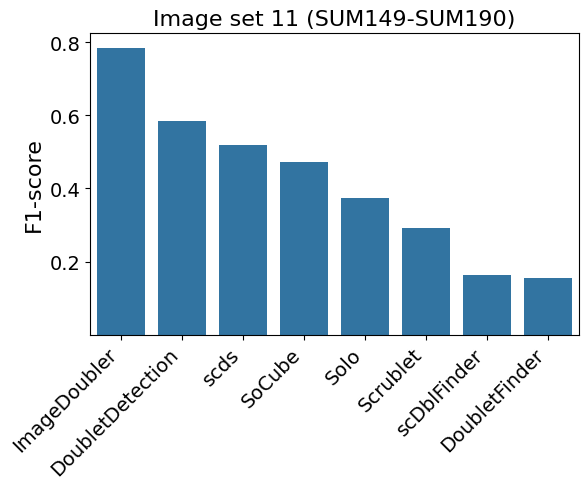

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
# reduce the bar width
sns.barplot(data=res_methods[res_methods.method != "ImageDoubler-loocv"], x="method", y="f1_score", ax=ax)
ax.set_ylabel("F1-score", fontsize=16)
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_title("Image set 11 (SUM149-SUM190)", fontsize=16)
plt.tight_layout()
plt.savefig("Figure4/f1_scores_img11.png", dpi=300)

#### UMAPs of expression: for Figure 3, with missings

Difficults are included

In [10]:
adata = sc.read_h5ad("./expression/results/image-based/adata_img5_wPreds.h5ad")
# adata = adata[adata.obs["pred_image_class"].notnull(), ]
adata = adata[adata.obs["class"].notnull(), ]
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata, n_components=2)

umap_data = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP1", "UMAP2"], index=adata.obs.index)
umap_data["class"] = adata.obs["class"]
umap_data["pred_image_class"] = adata.obs["pred_image_class"]
# umap_data.to_csv("./Figure3/umap_data_img5.csv", index=False)
umap_data.to_csv("./Figure3/umap_data_img5_gtnotnull.csv", index=False)

/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:544: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}
/home/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [12]:
adata = sc.read_h5ad("./expression/results/image-based/adata_img11_wPreds.h5ad")
# adata = adata[adata.obs["pred_image_class"].notnull(), ]
# adata = adata[adata.obs["class"].notnull(), ]
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata)

umap_data = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP1", "UMAP2"], index=adata.obs.index)
umap_data["class"] = adata.obs["class"]
umap_data["pred_image_class"] = adata.obs["pred_image_class"]
umap_data.to_csv("./Figure3/umap_data_img11.csv", index=False)
# umap_data.to_csv("./Figure3/umap_data_img11_gtnotnull.csv", index=False)

/local/disk1/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:693: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}
/local/disk1/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


#### UMAPs of expression: for Figure 4, without missings

In [29]:

adata = sc.read_h5ad("./expression/results/image-based/adata_img11_wPreds.h5ad")
# adata = adata[adata.obs["pred_image_class"].notnull() & (adata.obs["class"] != "Missing"), ]
adata = adata[adata.obs["class"].notnull() & (adata.obs["class"] != "Missing"), ]

adata_dd = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img11.h5ad")
adata_dd = adata_dd[adata.obs.index, ]
adata.obs["pred_doubletdetection"] = adata_dd.obs["preds_min_cells_0_n_top_genes_all_pvalue_0.0631_vote_thresh_0.3"]

adata_solo = sc.read_h5ad("./expression/results/solo/solo_img11.h5ad")
adata_solo = adata_solo[adata.obs.index, ]
adata.obs["pred_solo"] = adata_solo.obs["preds_min_cells_1_n_top_genes_2000"]

adata_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img11_noMissing.h5ad")
adata_scrublet = adata_scrublet[adata.obs.index, ]
adata.obs["pred_scrublet"] = adata_scrublet.obs["preds_doublets_thresh_0.06"]

adata_socube = sc.read_h5ad("./expression/results/socube/socube_img11_noMissing.h5ad")
adata_socube = adata_socube[adata.obs.index, ]
adata.obs["pred_socube"] = adata_socube.obs["preds_0.3"]

scds = pd.read_csv("./expression/results/scds/scds/scds_img11_doublet_scores_noMissing.csv", index_col=0)
scds["pred_scds"] = scds["hybrid_score"].apply(lambda x: "doublet" if x > 0.3 else "singlet")
scds = scds.set_index("image_pos")
scds = scds.loc[adata.obs.index]
adata.obs["pred_scds"] = scds["pred_scds"]

scdblfinder = pd.read_csv("expression/results/scDblFinder/scDblFinder/results_img11_noMissing.csv", index_col=0)
scdblfinder = scdblfinder.loc[adata.obs.index]
adata.obs["pred_scDblFinder"] = scdblfinder["scDblFinder.class"]

doubletfinder = pd.read_csv("expression/results/DoubletFinder/DoubletFinder/results_img11_noMissing.csv", index_col=0)
doubletfinder = doubletfinder.loc[adata.obs.index]
adata.obs["pred_doubletfinder"] = doubletfinder["DF.classifications_0.25_0.07_109"]

/tmp/ipykernel_32859/3752498073.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["pred_doubletdetection"] = adata_dd.obs["preds_min_cells_0_n_top_genes_all_pvalue_0.0631_vote_thresh_0.3"]


/local/disk1/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


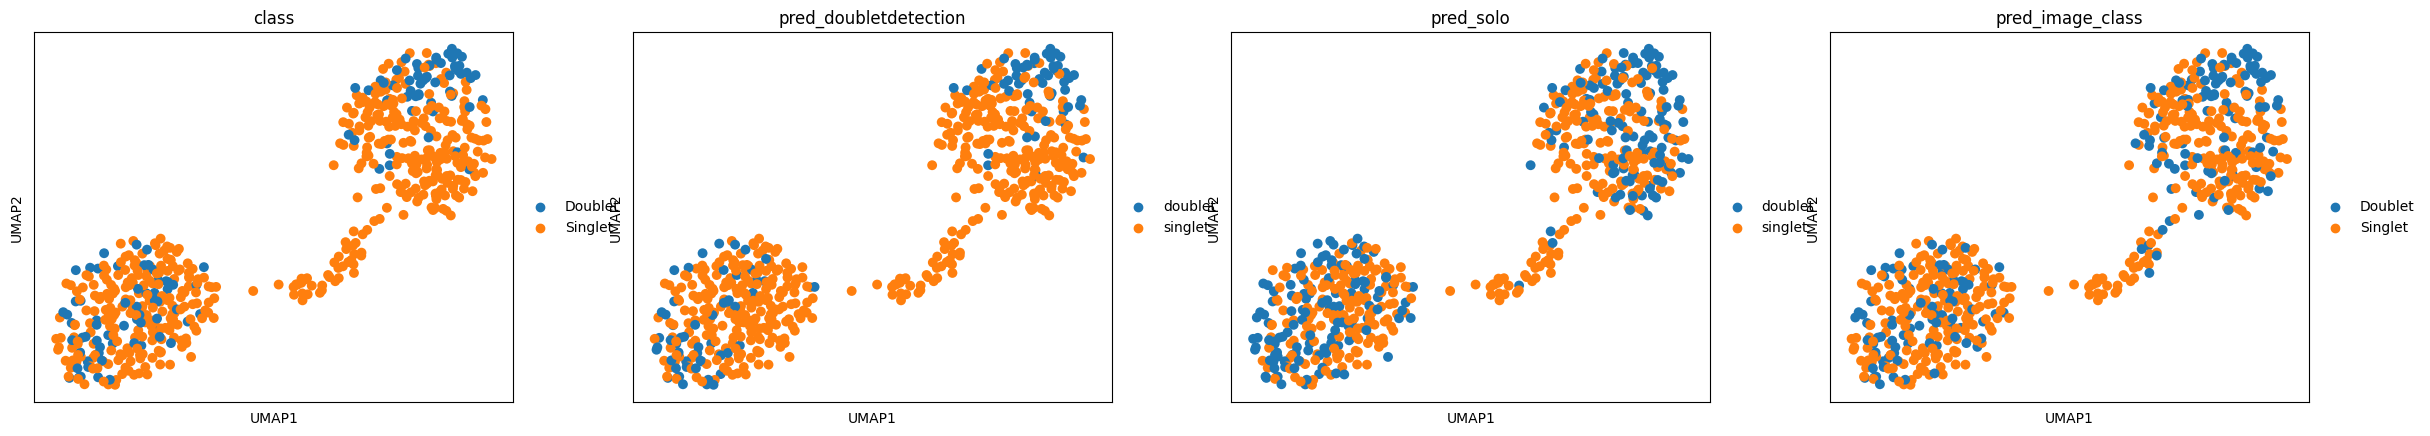

In [30]:
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["class", "pred_doubletdetection", "pred_solo", "pred_image_class"], na_in_legend=False)

In [15]:
preds_on_doublets = adata.obs[(adata.obs["class"] == "Singlet")].iloc[:, -6:]
preds_on_doublets = preds_on_doublets.apply(lambda x: x.str.lower())
(preds_on_doublets == "doublet").all().sum()

0

In [31]:
umap_data = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP1", "UMAP2"], index=adata.obs.index)
umap_data = pd.concat([umap_data, adata.obs], axis=1, ignore_index=False)
# umap_data.to_csv("./Figure4/umap_data_img11.csv")
umap_data.to_csv("./Figure4/umap_data_img11_gtnotnull.csv")

In [18]:
adata = sc.read_h5ad("./expression/results/image-based/adata_img5_wPreds.h5ad")
# adata = adata[adata.obs["pred_image_class"].notnull() & (adata.obs["class"] != "Missing"), ]
adata = adata[adata.obs["class"].notnull() & (adata.obs["class"] != "Missing"), ]

adata_dd = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img5_noMissing.h5ad")
adata_dd = adata_dd[adata.obs.index, ]
adata.obs["pred_doubletdetection"] = adata_dd.obs["preds_min_cells_0_n_top_genes_all_pvalue_0.0158_vote_thresh_0.6"]

adata_solo = sc.read_h5ad("./expression/results/solo/solo_img5_noMissing.h5ad")
adata_solo = adata_solo[adata.obs.index, ]
adata.obs["pred_solo"] = adata_solo.obs["preds_min_cells_10_n_top_genes_all"]

adata_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img5_noMissing.h5ad")
adata_scrublet = adata_scrublet[adata.obs.index, ]
adata.obs["pred_scrublet"] = adata_scrublet.obs["preds_doublets_thresh_0.06"]

adata_socube = sc.read_h5ad("./expression/results/socube/socube_img5_noMissing.h5ad")
adata_socube = adata_socube[adata.obs.index, ]
adata.obs["pred_socube"] = adata_socube.obs["preds_0.4"]

scds = pd.read_csv("./expression/results/scds/scds/scds_img5_doublet_scores_noMissing.csv", index_col=0)
scds["pred_scds"] = scds["hybrid_score"].apply(lambda x: "doublet" if x > 0.5 else "singlet")
scds = scds.set_index("image_pos")
scds = scds.loc[adata.obs.index]
adata.obs["pred_scds"] = scds["pred_scds"]

scdblfinder = pd.read_csv("expression/results/scDblFinder/scDblFinder/results_img5_noMissing.csv", index_col=0)
scdblfinder = scdblfinder.loc[adata.obs.index]
adata.obs["pred_scDblFinder"] = scdblfinder["scDblFinder.class"]

doubletfinder = pd.read_csv("expression/results/DoubletFinder/DoubletFinder/results_img5_noMissing.csv", index_col=0)
doubletfinder = doubletfinder.loc[adata.obs.index]
adata.obs["pred_doubletfinder"] = doubletfinder["DF.classifications_0.25_0.07_31"]

/tmp/ipykernel_6499/2989805914.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["pred_doubletdetection"] = adata_dd.obs["preds_min_cells_0_n_top_genes_all_pvalue_0.0158_vote_thresh_0.6"]


/local/disk1/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


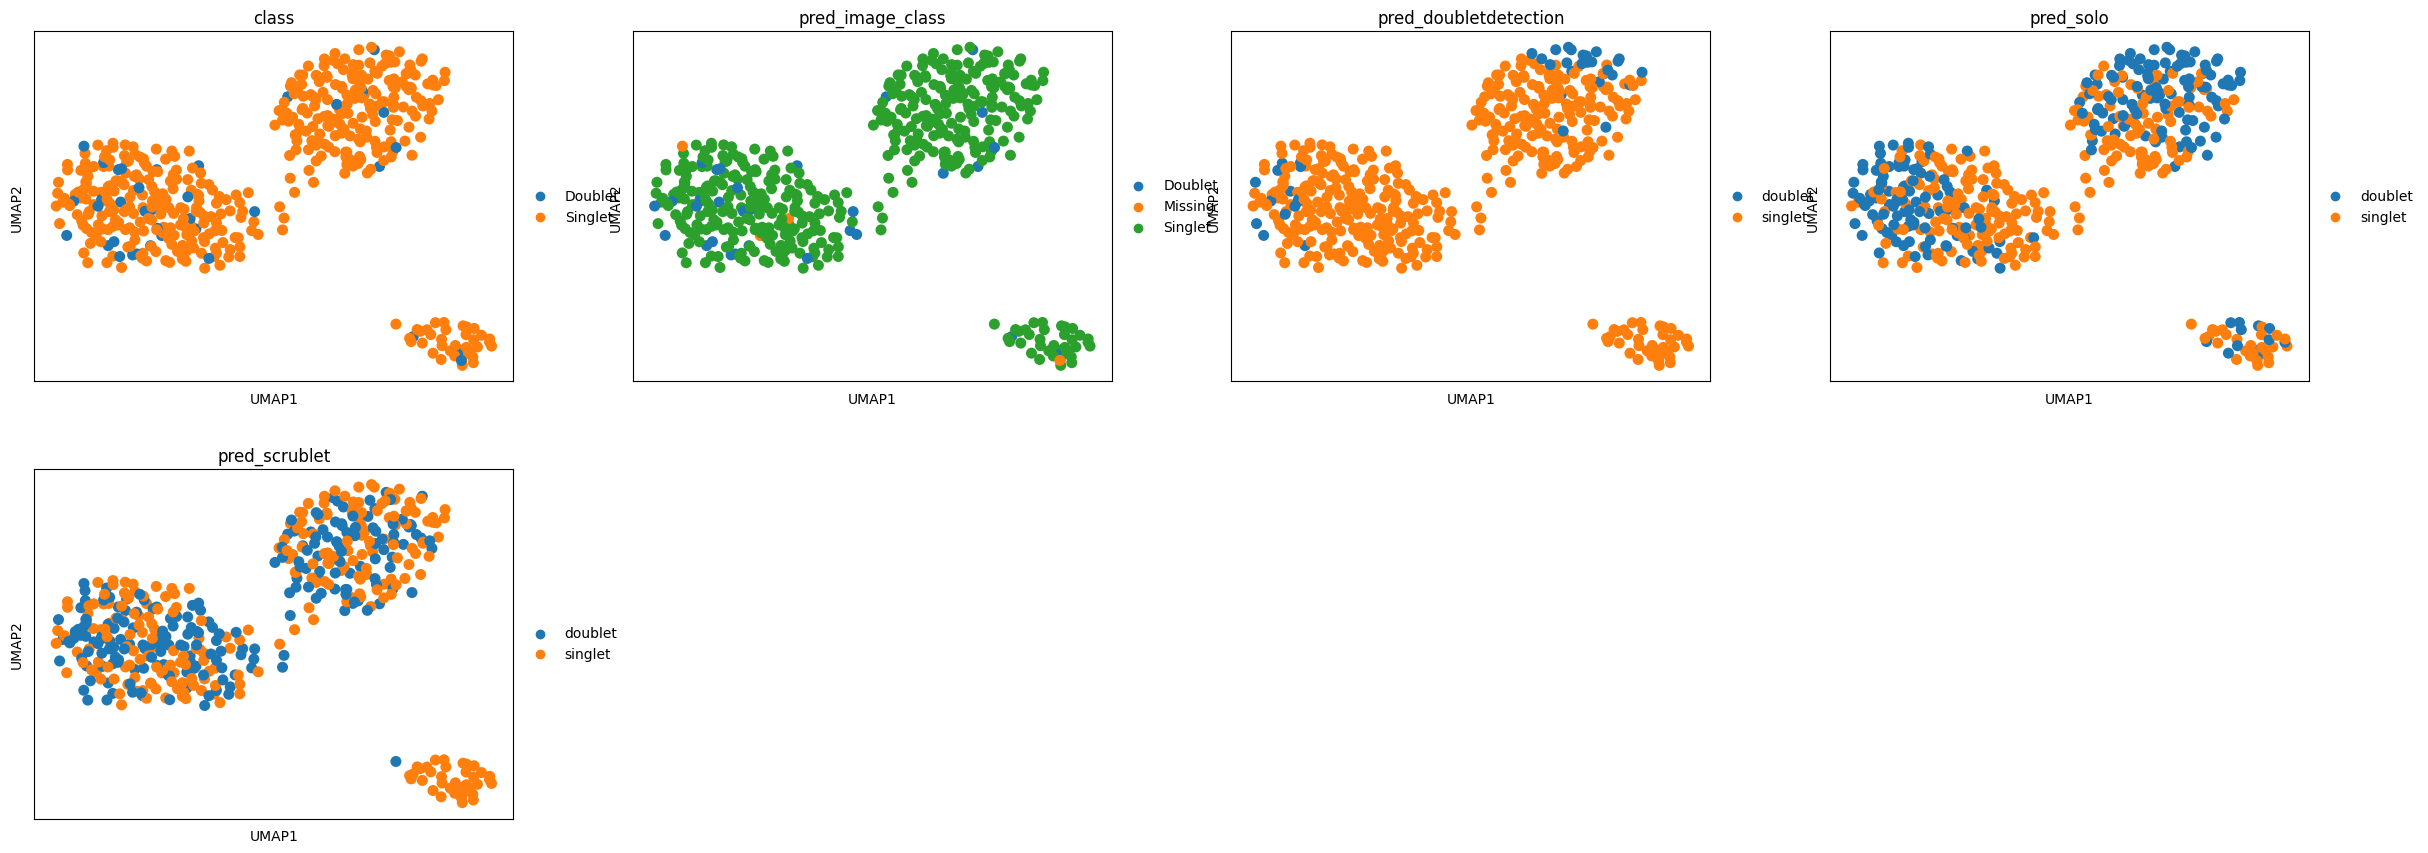

In [19]:
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["class", "pred_image_class", "pred_doubletdetection", "pred_solo", "pred_scrublet"], na_in_legend=False)

In [21]:
umap_data = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP1", "UMAP2"], index=adata.obs.index)
umap_data = pd.concat([umap_data, adata.obs], axis=1, ignore_index=False)
# umap_data.to_csv("./Figure4/umap_data_img5.csv")
umap_data.to_csv("./Figure4/umap_data_img5_gtnotnull.csv")

#### UMAPs of expression: for Figure 4, with missings

In [2]:
adata = sc.read_h5ad("./expression/results/image-based/adata_img11_wPreds.h5ad")
# adata = adata[adata.obs["pred_image_class"].notnull() & (adata.obs["class"] != "Missing"), ]
# adata = adata[adata.obs["class"].notnull(), ]

adata_dd = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img11.h5ad")
adata_dd = adata_dd[adata.obs.index, ]
adata.obs["pred_doubletdetection"] = adata_dd.obs["preds_min_cells_0_n_top_genes_all_pvalue_0.0631_vote_thresh_0.3"]

adata_solo = sc.read_h5ad("./expression/results/solo/solo_img11.h5ad")
adata_solo = adata_solo[adata.obs.index, ]
adata.obs["pred_solo"] = adata_solo.obs["preds_min_cells_1_n_top_genes_5000"]

adata_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img11.h5ad")
adata_scrublet = adata_scrublet[adata.obs.index, ]
adata.obs["pred_scrublet"] = adata_scrublet.obs["preds_doublets_thresh_0.06"]

adata_socube = sc.read_h5ad("./expression/results/socube/socube_img11.h5ad")
adata_socube = adata_socube[adata.obs.index, ]
adata.obs["pred_socube"] = adata_socube.obs["preds_0.3"]

scds = pd.read_csv("./expression/results/scds/scds/scds_img11_doublet_scores.csv", index_col=0)
scds["pred_scds"] = scds["bcds_score"].apply(lambda x: "doublet" if x > 0.5 else "singlet")
scds = scds.set_index("image_pos")
scds = scds.loc[adata.obs.index]
adata.obs["pred_scds"] = scds["pred_scds"]

scdblfinder = pd.read_csv("expression/results/scDblFinder/scDblFinder/results_img11.csv", index_col=0)
scdblfinder = scdblfinder.loc[adata.obs.index]
adata.obs["pred_scDblFinder"] = scdblfinder["scDblFinder.class"]

doubletfinder = pd.read_csv("expression/results/DoubletFinder/DoubletFinder/results_img11.csv", index_col=0)
doubletfinder = doubletfinder.loc[adata.obs.index]
adata.obs["pred_doubletfinder"] = doubletfinder["DF.classifications_0.25_0.06_123"]

In [3]:
adata_img11 = adata.copy()
adata_img11.obs = adata_img11.obs.reset_index().set_index("image_pos", drop=False)
adata_img11.obs[['COL', 'ROW']] = adata_img11.obs['image_pos'].str.split('_', expand=True)
# Extract only the numbers
adata_img11.obs['COL'] = adata_img11.obs['COL'].str.extract('(\d+)')
adata_img11.obs['ROW'] = adata_img11.obs['ROW'].str.extract('(\d+)')
# Convert the columns to numeric type
adata_img11.obs['COL'] = pd.to_numeric(adata_img11.obs['COL'])
adata_img11.obs['ROW'] = pd.to_numeric(adata_img11.obs['ROW'])

adata_img11.obs.loc[adata_img11.obs.COL > 10, "cell_type"] = "SUM190"
adata_img11.obs.loc[adata_img11.obs.COL <= 10, "cell_type"] = "SUM149"

In [4]:
adata_img11.obs.to_csv("Figure4/obs_img11.csv", index=False)

/local/disk1/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


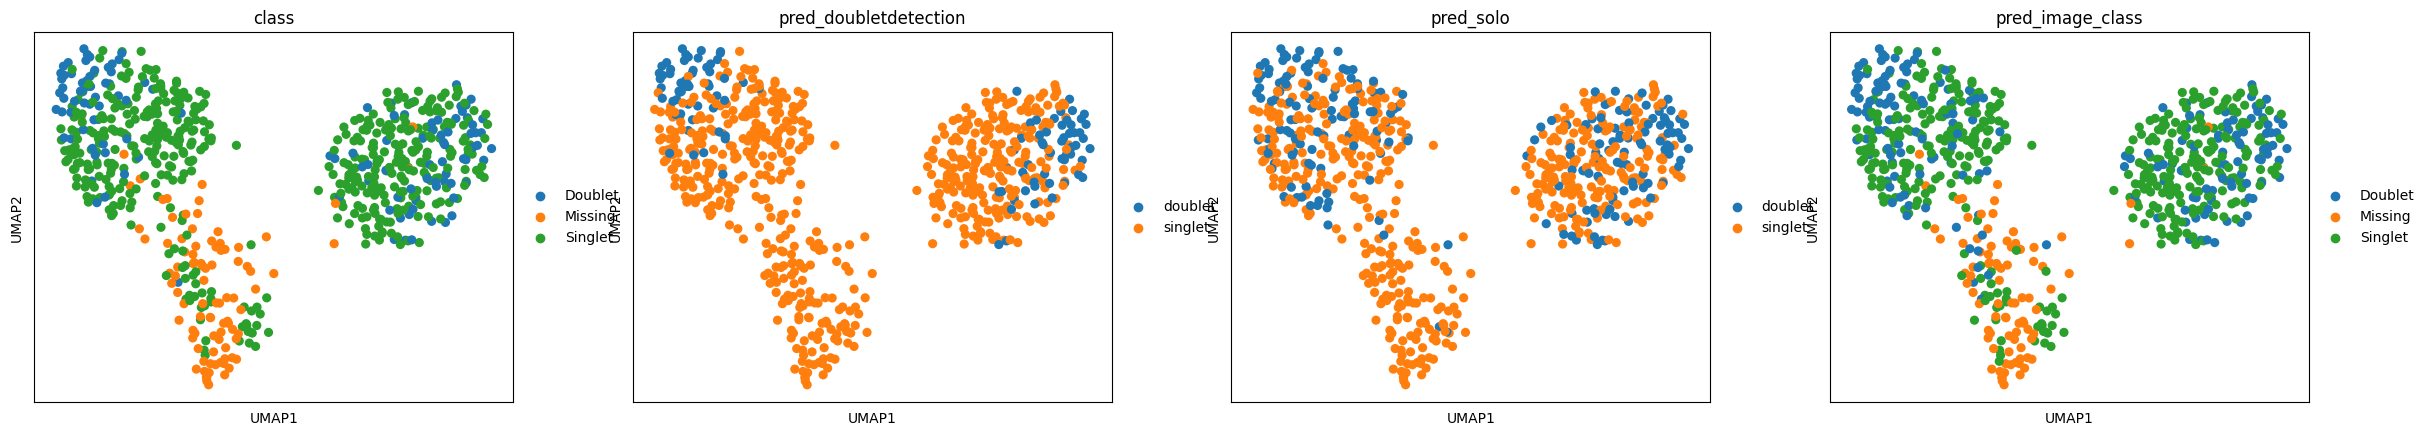

In [34]:
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["class", "pred_doubletdetection", "pred_solo", "pred_image_class"], na_in_legend=False)

In [35]:
umap_data = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP1", "UMAP2"], index=adata.obs.index)
umap_data = pd.concat([umap_data, adata.obs], axis=1, ignore_index=False)
# umap_data.to_csv("./Figure4/umap_data_img11.csv")
umap_data.to_csv("./Figure4/umap_data_img11_gtwnull.csv")

In [5]:
adata = sc.read_h5ad("./expression/results/image-based/adata_img5_wPreds.h5ad")
# adata = adata[adata.obs["pred_image_class"].notnull() & (adata.obs["class"] != "Missing"), ]
# adata = adata[adata.obs["class"].notnull(), ]

adata_dd = sc.read_h5ad("./expression/results/DoubletDetection/doubletdetection_img5.h5ad")
adata_dd = adata_dd[adata.obs.index, ]
adata.obs["pred_doubletdetection"] = adata_dd.obs["preds_min_cells_0_n_top_genes_all_pvalue_0.0100_vote_thresh_0.6"]

adata_solo = sc.read_h5ad("./expression/results/solo/solo_img5.h5ad")
adata_solo = adata_solo[adata.obs.index, ]
adata.obs["pred_solo"] = adata_solo.obs["preds_min_cells_0_n_top_genes_5000"]

adata_scrublet = sc.read_h5ad("./expression/results/scrublet/scrublet_img5.h5ad")
adata_scrublet = adata_scrublet[adata.obs.index, ]
adata.obs["pred_scrublet"] = adata_scrublet.obs["preds_doublets_thresh_0.06"]

adata_socube = sc.read_h5ad("./expression/results/socube/socube_img5.h5ad")
adata_socube = adata_socube[adata.obs.index, ]
adata.obs["pred_socube"] = adata_socube.obs["preds_0.3"]

scds = pd.read_csv("./expression/results/scds/scds/scds_img5_doublet_scores.csv", index_col=0)
scds["pred_scds"] = scds["bcds_score"].apply(lambda x: "doublet" if x > 0.4 else "singlet")
scds = scds.set_index("image_pos")
scds = scds.loc[adata.obs.index]
adata.obs["pred_scds"] = scds["pred_scds"]

scdblfinder = pd.read_csv("expression/results/scDblFinder/scDblFinder/results_img5.csv", index_col=0)
scdblfinder = scdblfinder.loc[adata.obs.index]
adata.obs["pred_scDblFinder"] = scdblfinder["scDblFinder.class"]

doubletfinder = pd.read_csv("expression/results/DoubletFinder/DoubletFinder/results_img5.csv", index_col=0)
doubletfinder = doubletfinder.loc[adata.obs.index]
adata.obs["pred_doubletfinder"] = doubletfinder["DF.classifications_0.25_0.25_41"]

In [6]:
adata_img5 = adata.copy()
adata_img5.obs = adata_img5.obs.reset_index().set_index("image_pos", drop=False)
adata_img5.obs[['COL', 'ROW']] = adata_img5.obs['image_pos'].str.split('_', expand=True)
# Extract only the numbers
adata_img5.obs['COL'] = adata_img5.obs['COL'].str.extract('(\d+)')
adata_img5.obs['ROW'] = adata_img5.obs['ROW'].str.extract('(\d+)')
# Convert the columns to numeric type
adata_img5.obs['COL'] = pd.to_numeric(adata_img5.obs['COL'])
adata_img5.obs['ROW'] = pd.to_numeric(adata_img5.obs['ROW'])

adata_img5.obs.loc[adata_img5.obs.COL > 10, "cell_type"] = "H1975"
adata_img5.obs.loc[adata_img5.obs.COL <= 10, "cell_type"] = "SUM149"

In [7]:
adata_img5.obs.to_csv("Figure4/obs_img5.csv", index=False)

/local/disk1/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


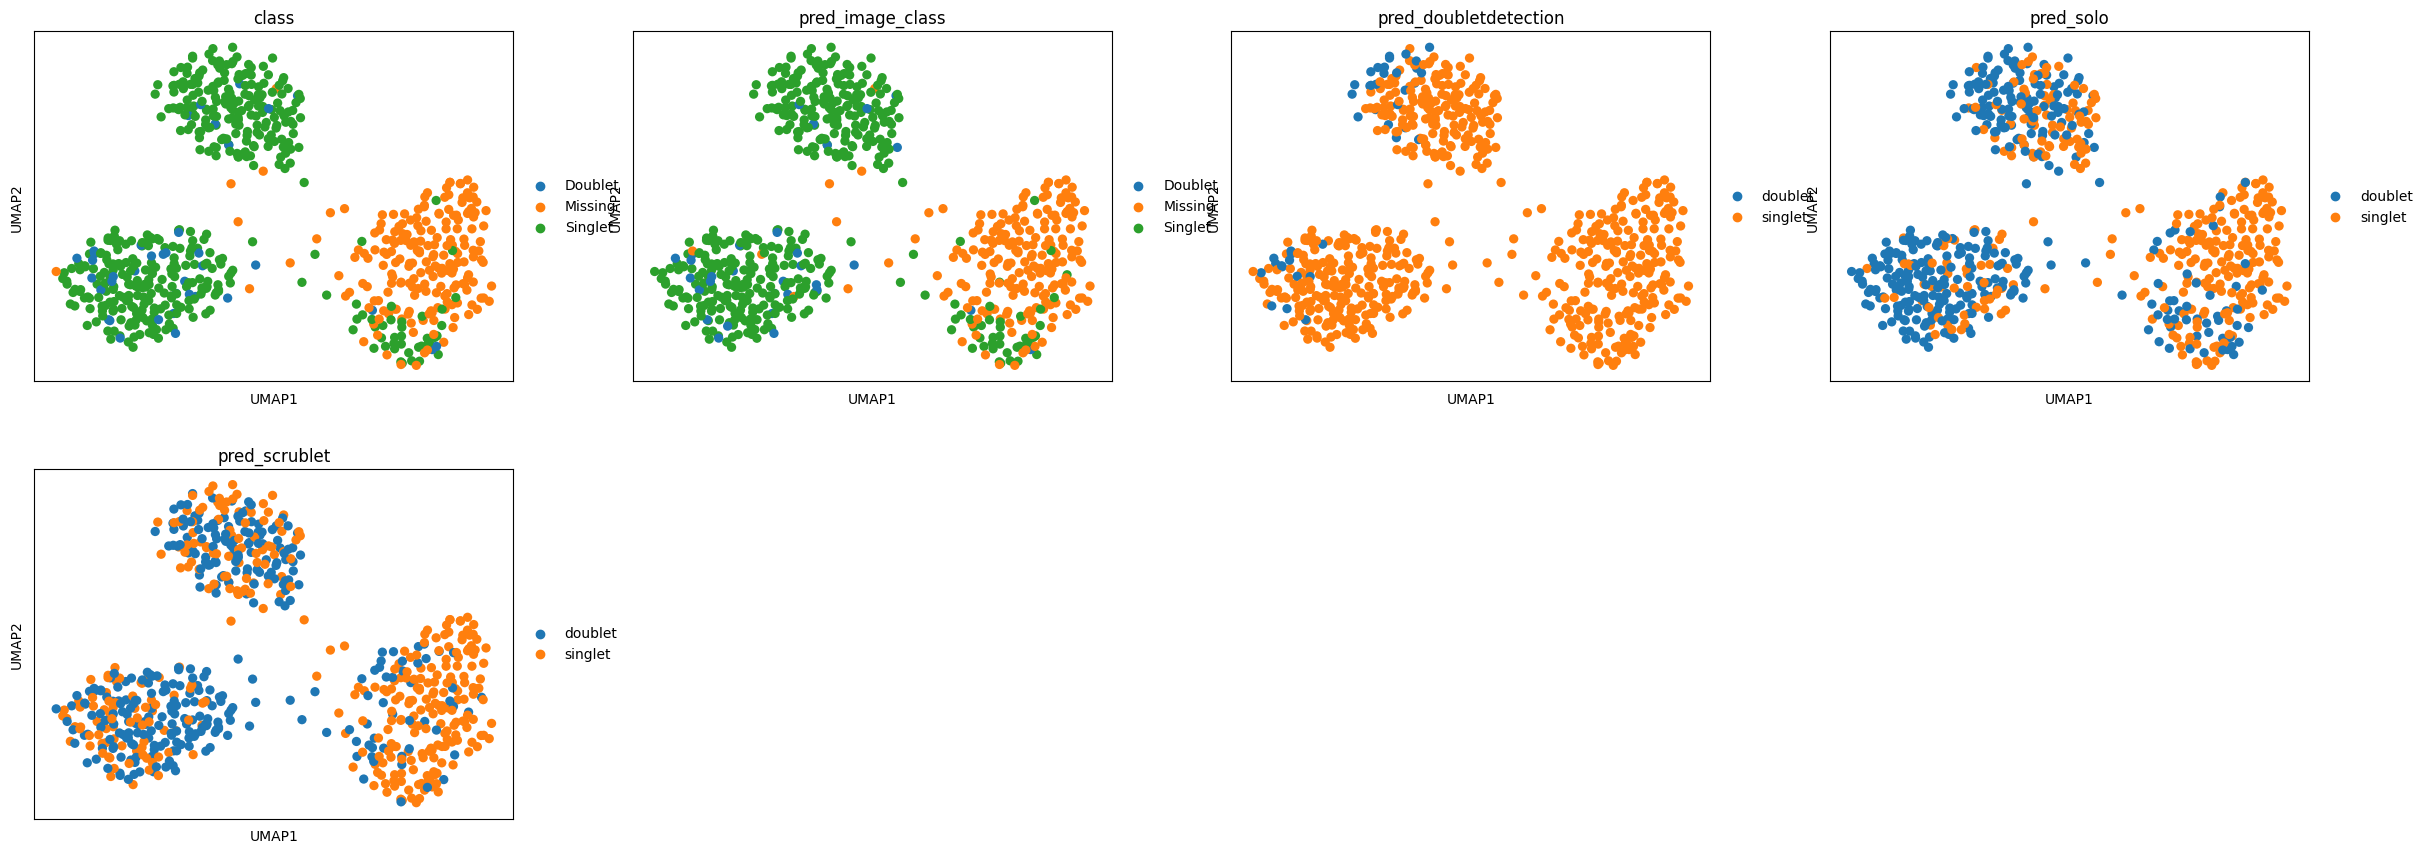

In [32]:
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["class", "pred_image_class", "pred_doubletdetection", "pred_solo", "pred_scrublet"], na_in_legend=False)

In [33]:
umap_data = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP1", "UMAP2"], index=adata.obs.index)
umap_data = pd.concat([umap_data, adata.obs], axis=1, ignore_index=False)
# umap_data.to_csv("./Figure4/umap_data_img5.csv")
umap_data.to_csv("./Figure4/umap_data_img5_gtwnull.csv")

In [29]:
# solo = sc.read_h5ad("./expression/results/DoubletDetection/srublet")
# scores = solo.uns
# del scores["hvg"]
# # del scores["_scvi_manager_uuid"]
# # del scores["_scvi_uuid"]
# sorted_scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1]['f1_score'], reverse=True)}
# sorted_scores

In [30]:
# scores = pd.read_csv("expression/results/scDblFinder/scDblFinder/scores.csv", index_col=0)
# scores = scores[scores.index.str.contains("img5")].sort_values(by="f1", ascending=False)
# doubletfinder = pd.read_csv("expression/results/DoubletFinder/DoubletFinder/results_img5_noMissing.csv", index_col=0)

#### UMAP for expression: before or after keeping the missing and doublets

In [12]:
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
import warnings
warnings.simplefilter("ignore")

In [24]:
def get_umap_of_removal(in_adata, col_detection=None, detection_method=None):
    adata = in_adata.copy()
    if col_detection is not None:
        adata.obs[col_detection] = adata.obs[col_detection].str.lower()
        adata = adata[adata.obs[col_detection] == "singlet"]
    adata.obs["detectiont_method"] = detection_method

    librarySize = adata.X.sum(axis=1)
    adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
    adata.X = np.log2(adata.X + 1)
    sc.pp.highly_variable_genes(adata, n_top_genes=3000)
    adata = adata[:, adata.var.highly_variable]
    sc.pp.scale(adata)
    sc.tl.pca(adata, svd_solver='full')
    sc.pp.neighbors(adata, n_pcs = 50)
    sc.tl.umap(adata, n_components=2)
    sc.tl.leiden(adata, resolution = 0.5)
    sc.pl.umap(adata, color=['cell_type', "class", "leiden"])

    umap_data = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP1", "UMAP2"], index=adata.obs.index)
    umap_data = pd.concat([umap_data, adata.obs], axis=1, ignore_index=False)
    return umap_data

In [14]:
umap_data_of_removal = pd.DataFrame()
umap_data_of_removal = pd.concat([
    umap_data_of_removal,
    get_umap_of_removal(adata_img5, None, "no removal"),
    get_umap_of_removal(adata_img5, "class", "Ground-truth"),
    get_umap_of_removal(adata_img5, "pred_image_class", "ImageDoubler"),
    get_umap_of_removal(adata_img5, "pred_doubletdetection", "DoubletDetection"),
    get_umap_of_removal(adata_img5, "pred_scrublet", "Scrublet"),
    get_umap_of_removal(adata_img5, "pred_solo", "Solo"),
    get_umap_of_removal(adata_img5, "pred_scds", "scds"),
    get_umap_of_removal(adata_img5, "pred_scDblFinder", "scDblFinder"),
    get_umap_of_removal(adata_img5, "pred_doubletfinder", "DoubletFinder"),
], ignore_index=True)
umap_data_of_removal.to_csv("Figure4/umap_data_removal_img5.csv", index=False)

In [130]:
cluster_acc = []
for method in np.unique(umap_data_of_removal["detectiont_method"]):
    cluster_acc.append(
        [
            method,
            adjusted_mutual_info_score(
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "cell_type"],
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "leiden"],
            ),
            adjusted_rand_score(
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "cell_type"],
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "leiden"],
            ),
        ]
    )
cluster_acc = pd.DataFrame(cluster_acc, columns=["method", "AMI", "RI"])
cluster_acc.to_csv("Figure5/cluster_acc_img5.csv", index=False)

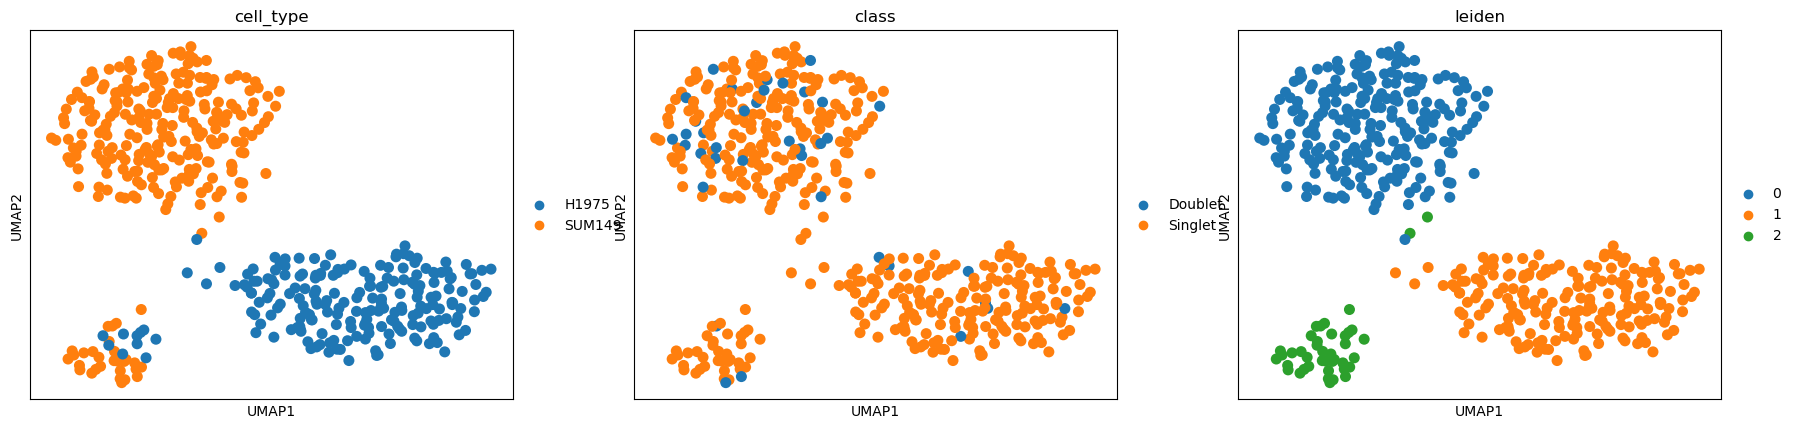

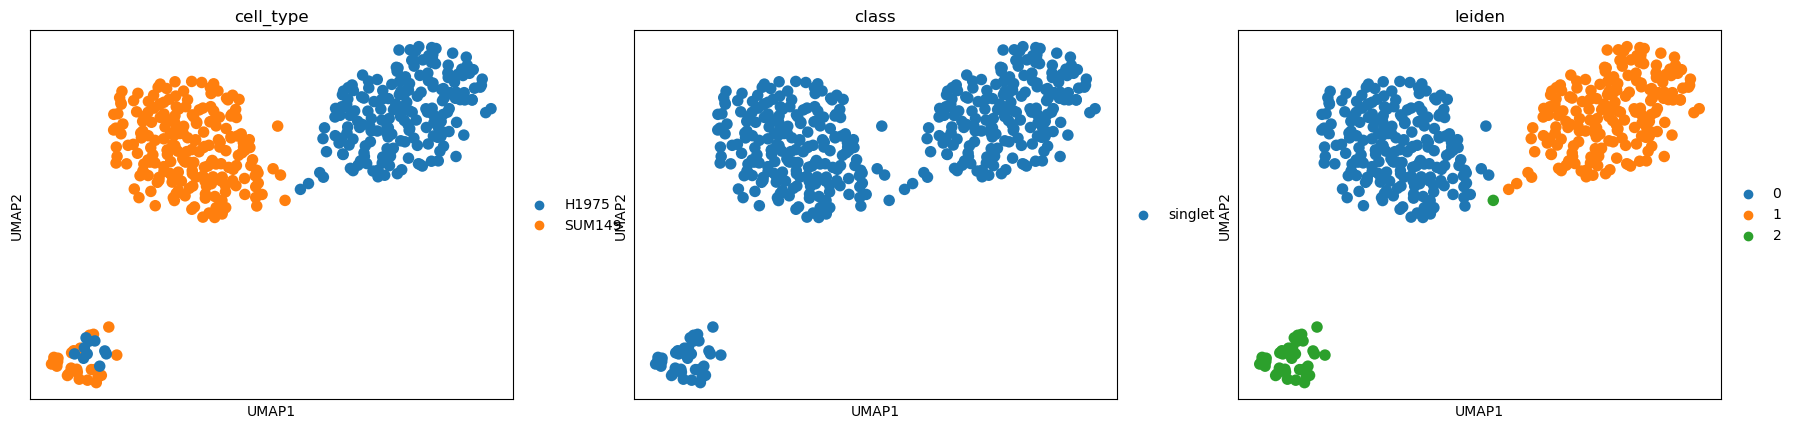

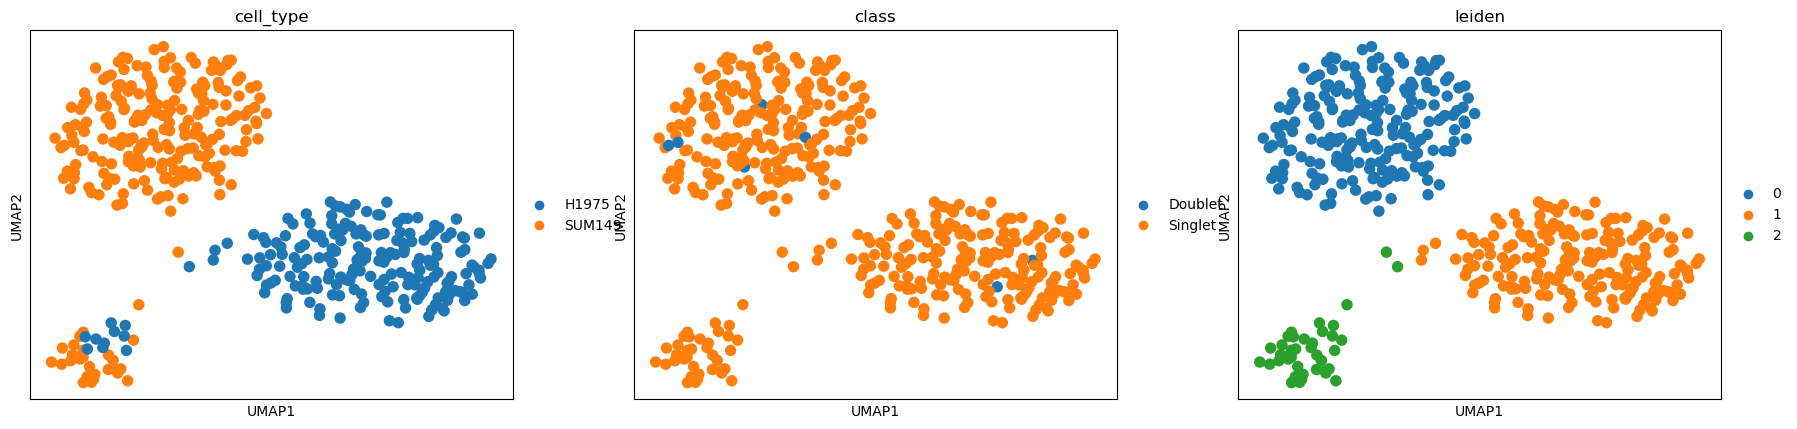

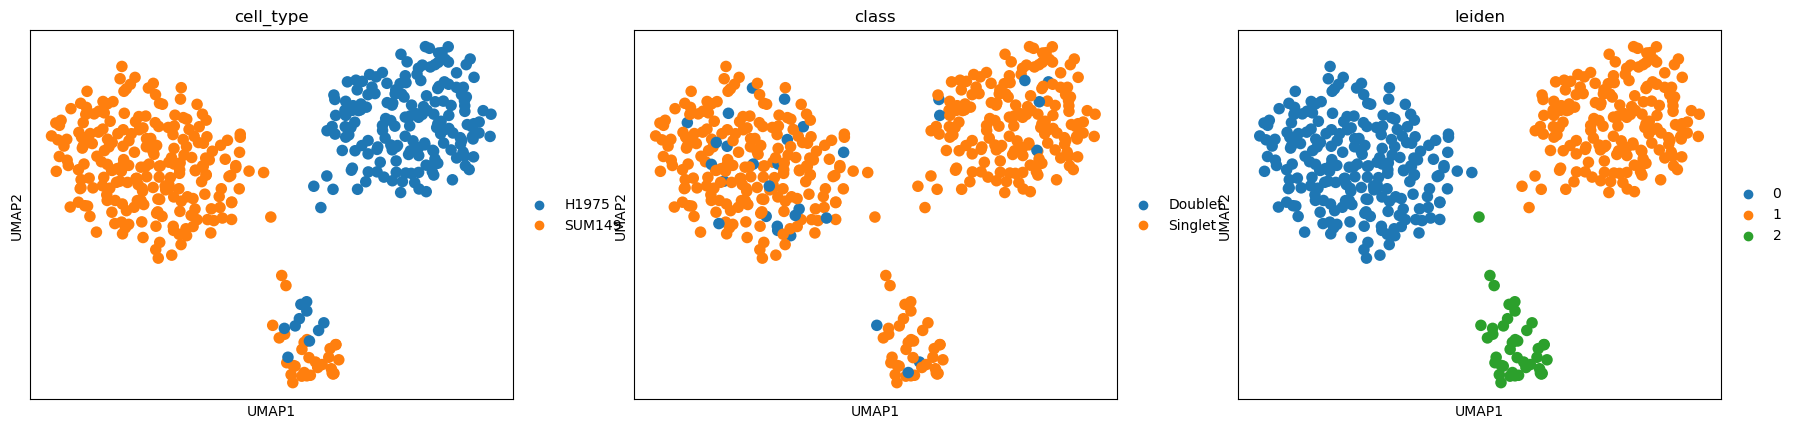

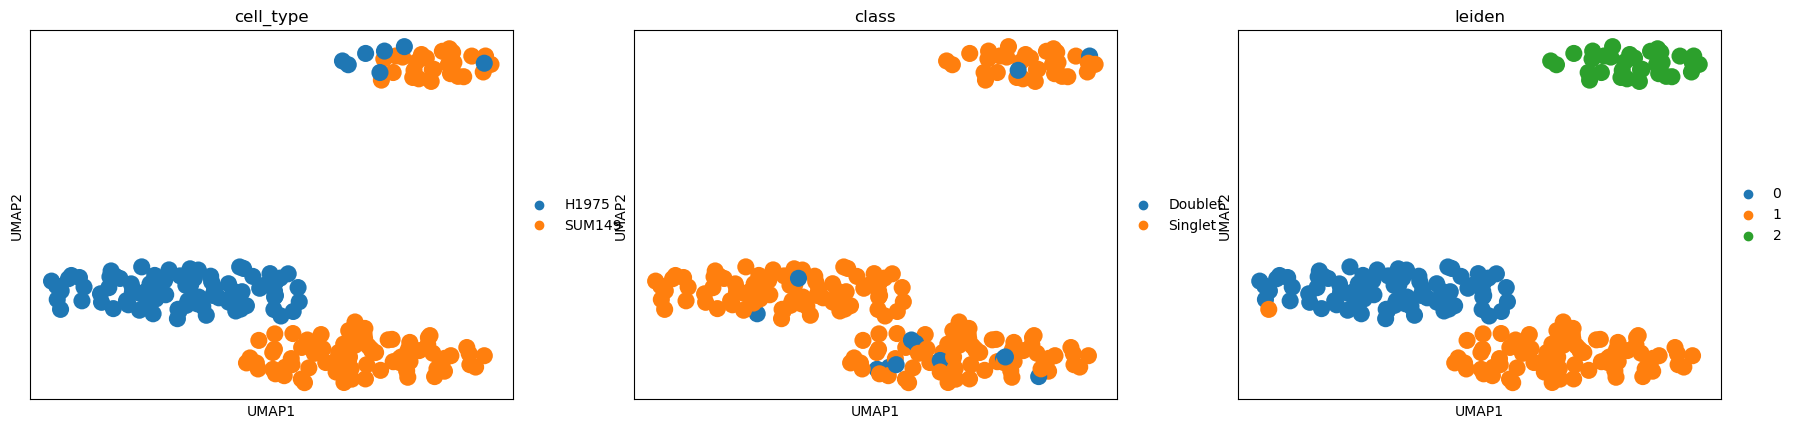

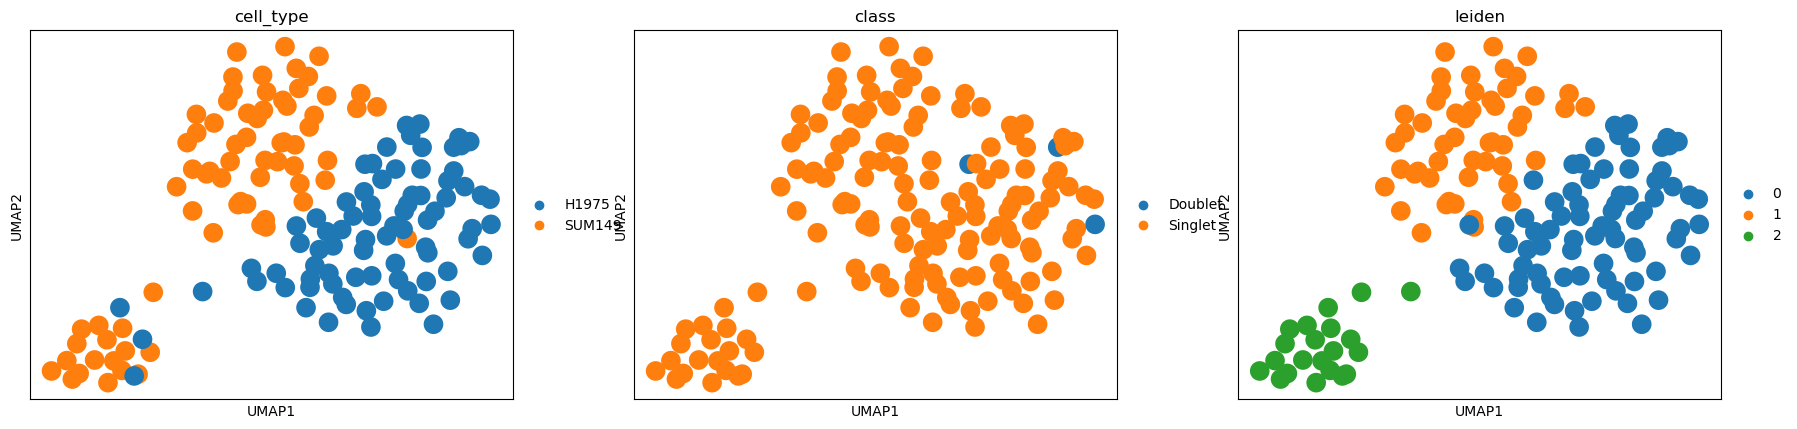

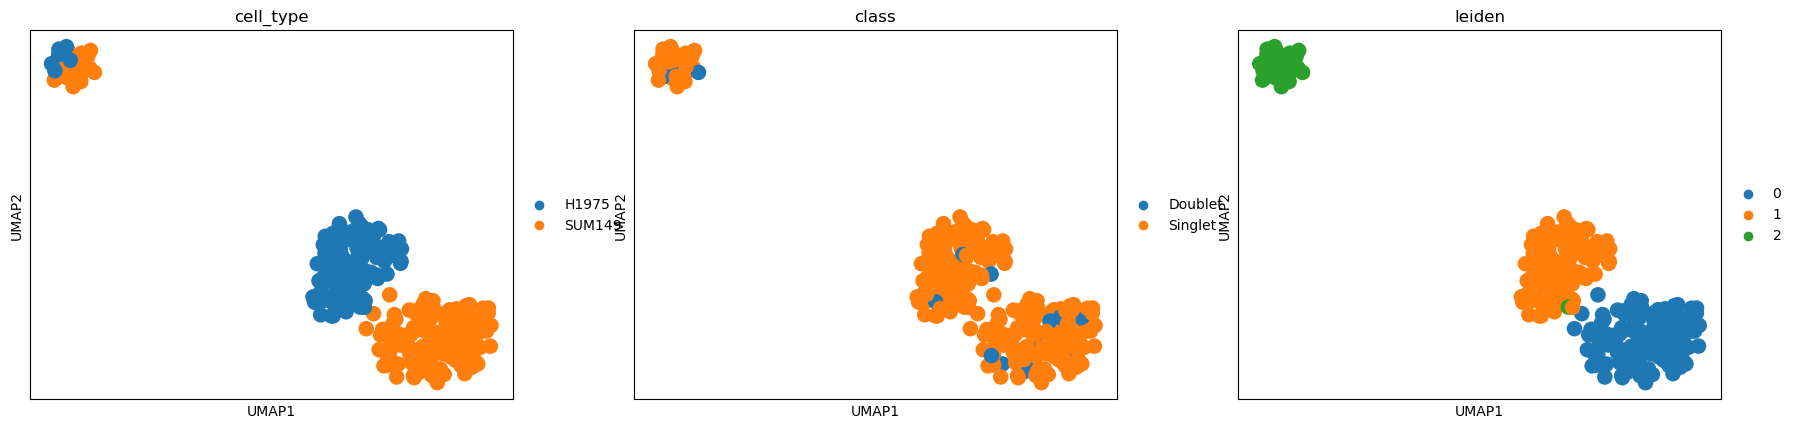

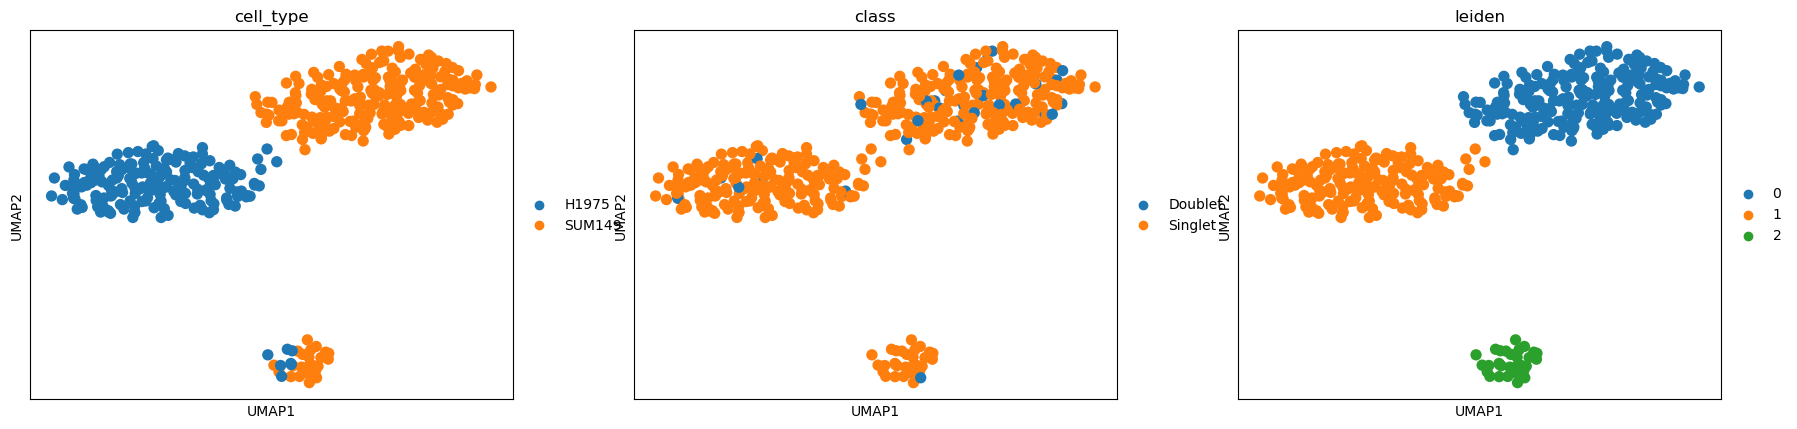

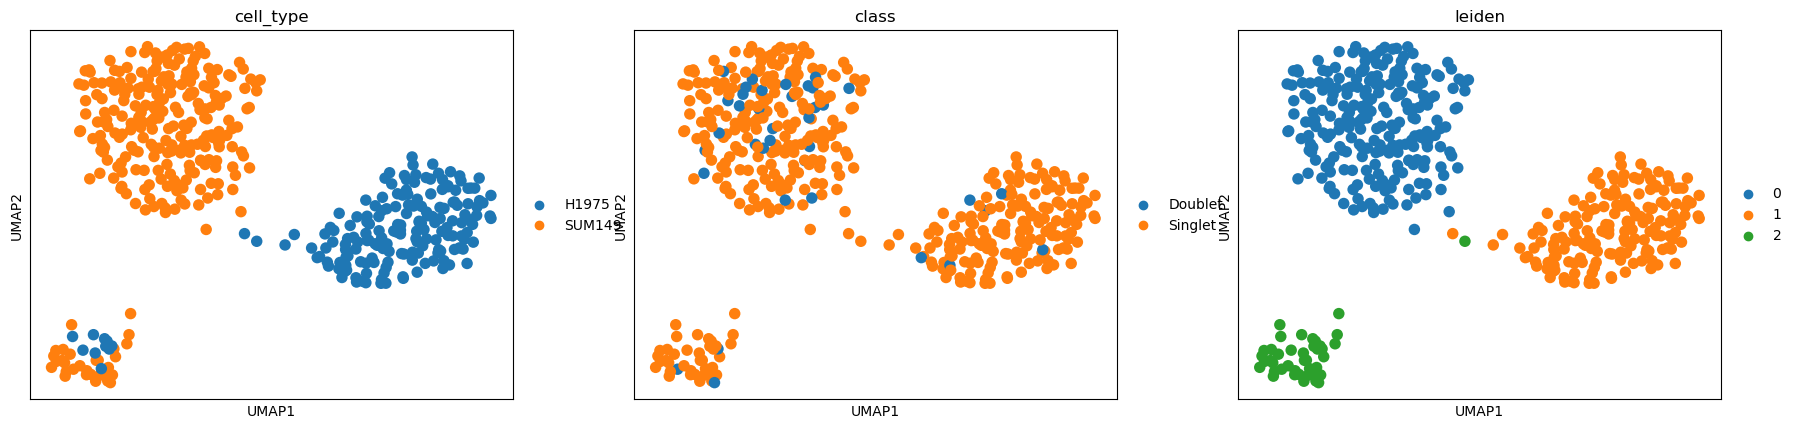

In [26]:
# try removing the missings
adata_img5 = adata_img5[adata_img5.obs["class"] != "Missing"]
umap_data_of_removal = pd.DataFrame()
umap_data_of_removal = pd.concat([
    umap_data_of_removal,
    get_umap_of_removal(adata_img5, None, "no removal"),
    get_umap_of_removal(adata_img5, "class", "Ground-truth"),
    get_umap_of_removal(adata_img5, "pred_image_class", "ImageDoubler"),
    get_umap_of_removal(adata_img5, "pred_doubletdetection", "DoubletDetection"),
    get_umap_of_removal(adata_img5, "pred_scrublet", "Scrublet"),
    get_umap_of_removal(adata_img5, "pred_solo", "Solo"),
    get_umap_of_removal(adata_img5, "pred_scds", "scds"),
    get_umap_of_removal(adata_img5, "pred_scDblFinder", "scDblFinder"),
    get_umap_of_removal(adata_img5, "pred_doubletfinder", "DoubletFinder"),
], ignore_index=True)
umap_data_of_removal.to_csv("Figure5/umap_data_removal_img5_noMissing.csv", index=False)

In [18]:
cluster_acc = []
for method in np.unique(umap_data_of_removal["detectiont_method"]):
    cluster_acc.append(
        [
            method,
            adjusted_mutual_info_score(
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "cell_type"],
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "leiden"],
            ),
            adjusted_rand_score(
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "cell_type"],
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "leiden"],
            ),
        ]
    )
cluster_acc = pd.DataFrame(cluster_acc, columns=["method", "AMI", "RI"])
cluster_acc.to_csv("Figure5/cluster_acc_img5_noMissing.csv", index=False)

In [19]:
umap_data_of_removal = pd.DataFrame()
umap_data_of_removal = pd.concat([
    umap_data_of_removal,
    get_umap_of_removal(adata_img11, None, "no removal"),
    get_umap_of_removal(adata_img11, "class", "Ground-truth"),
    get_umap_of_removal(adata_img11, "pred_image_class", "ImageDoubler"),
    get_umap_of_removal(adata_img11, "pred_doubletdetection", "DoubletDetection"),
    get_umap_of_removal(adata_img11, "pred_scrublet", "Scrublet"),
    get_umap_of_removal(adata_img11, "pred_solo", "Solo"),
    get_umap_of_removal(adata_img11, "pred_scds", "scds"),
    get_umap_of_removal(adata_img11, "pred_scDblFinder", "scDblFinder"),
    get_umap_of_removal(adata_img11, "pred_doubletfinder", "DoubletFinder"),
], ignore_index=True);
umap_data_of_removal.to_csv("Figure5/umap_data_removal_img11.csv", index=False)

In [20]:
cluster_acc = []
for method in np.unique(umap_data_of_removal["detectiont_method"]):
    cluster_acc.append(
        [
            method,
            adjusted_mutual_info_score(
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "cell_type"],
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "leiden"],
            ),
            adjusted_rand_score(
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "cell_type"],
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "leiden"],
            ),
        ]
    )
cluster_acc = pd.DataFrame(cluster_acc, columns=["method", "AMI", "RI"])
cluster_acc.to_csv("Figure5/cluster_acc_img11.csv", index=False)

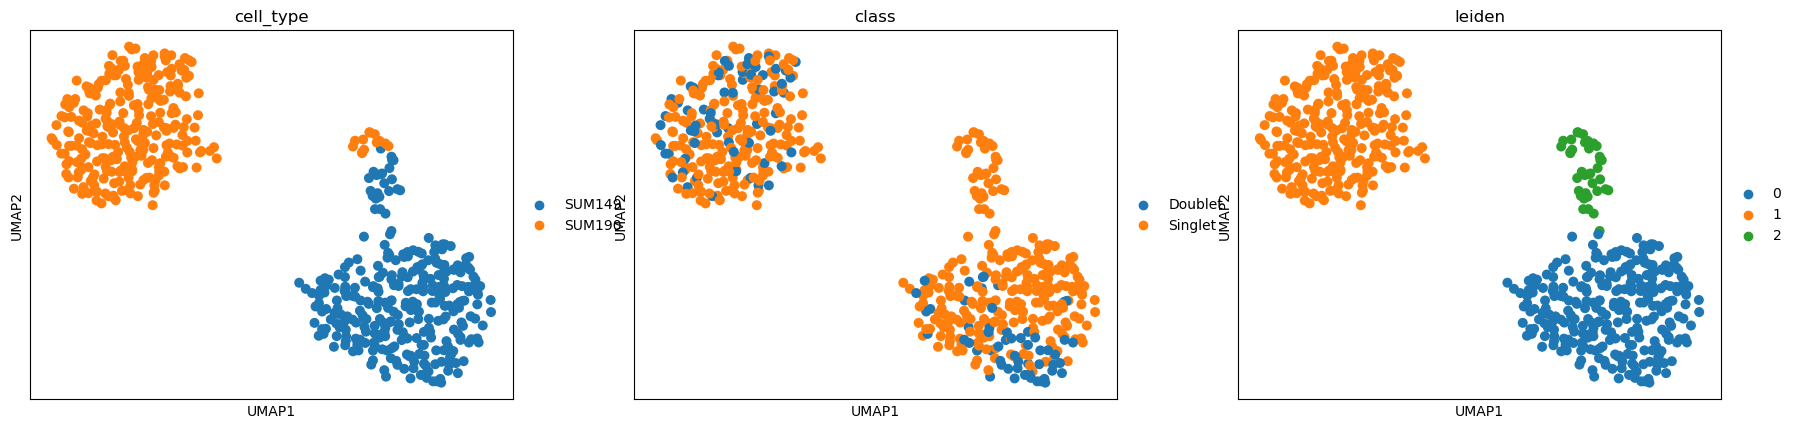

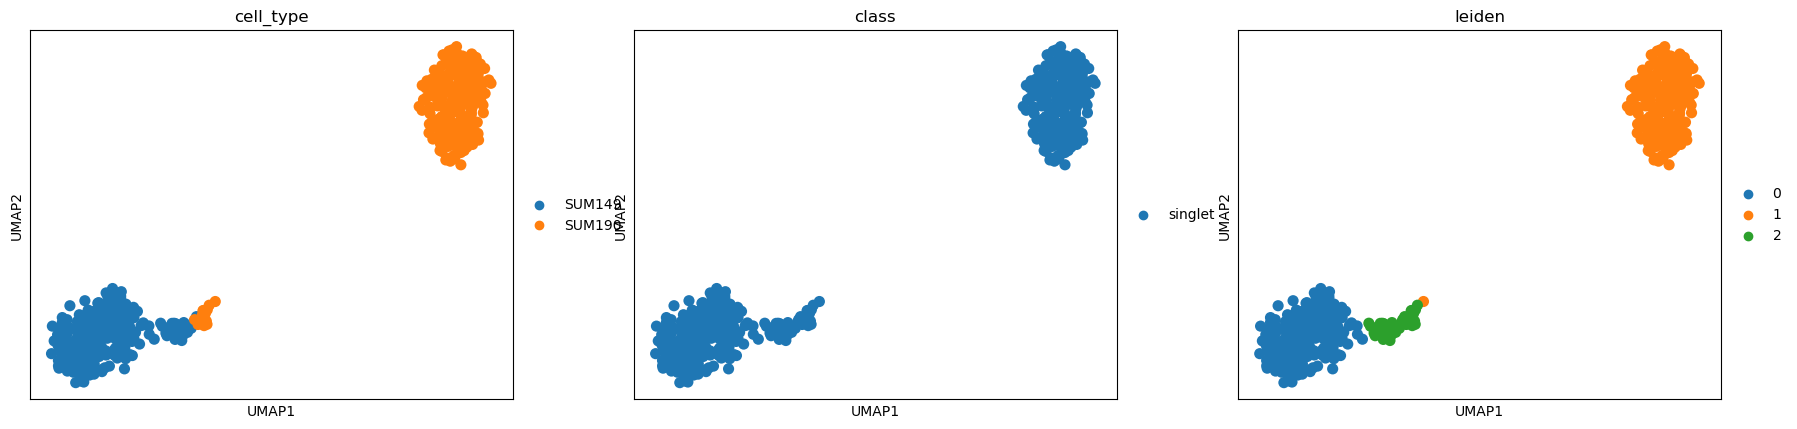

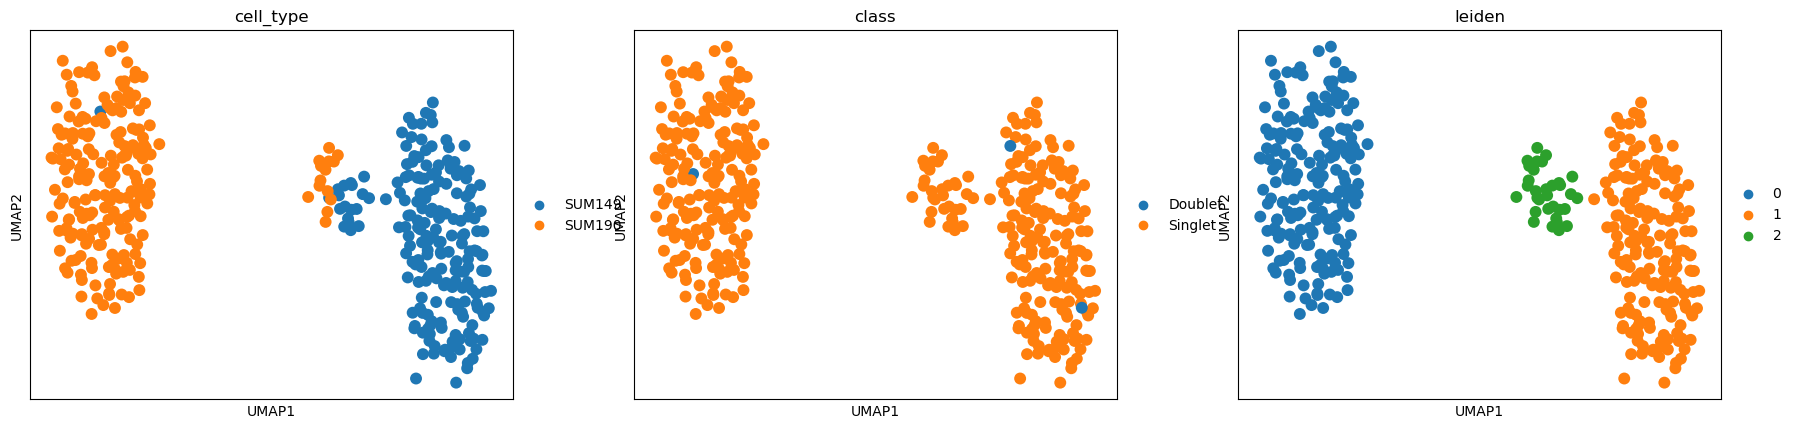

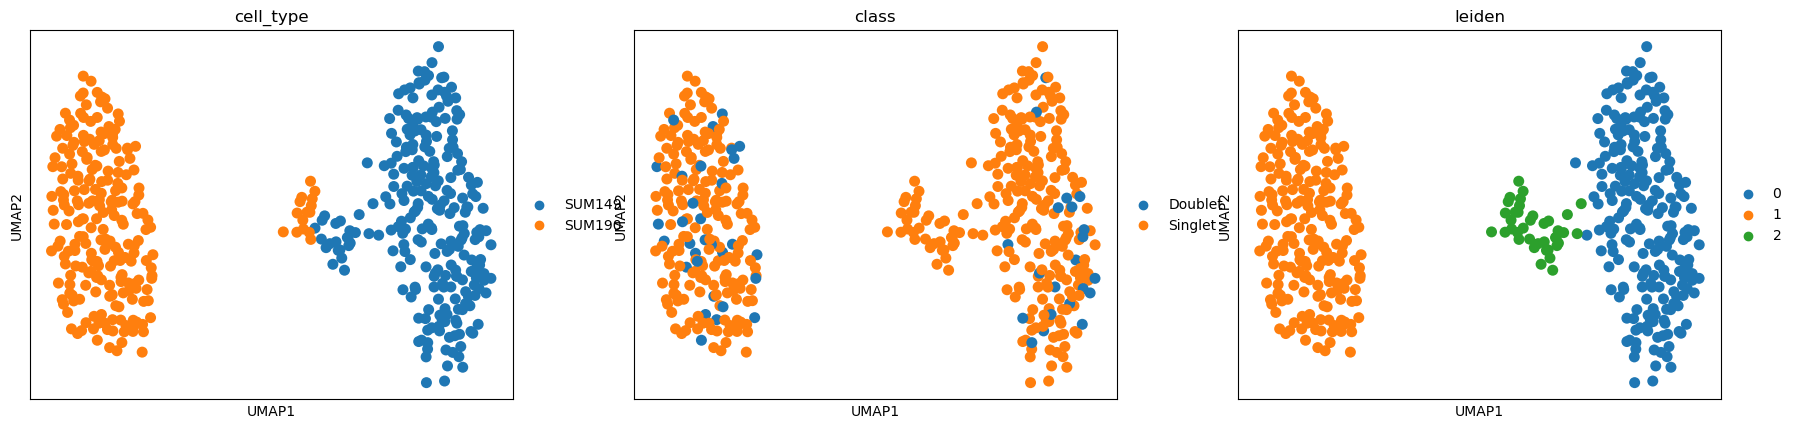

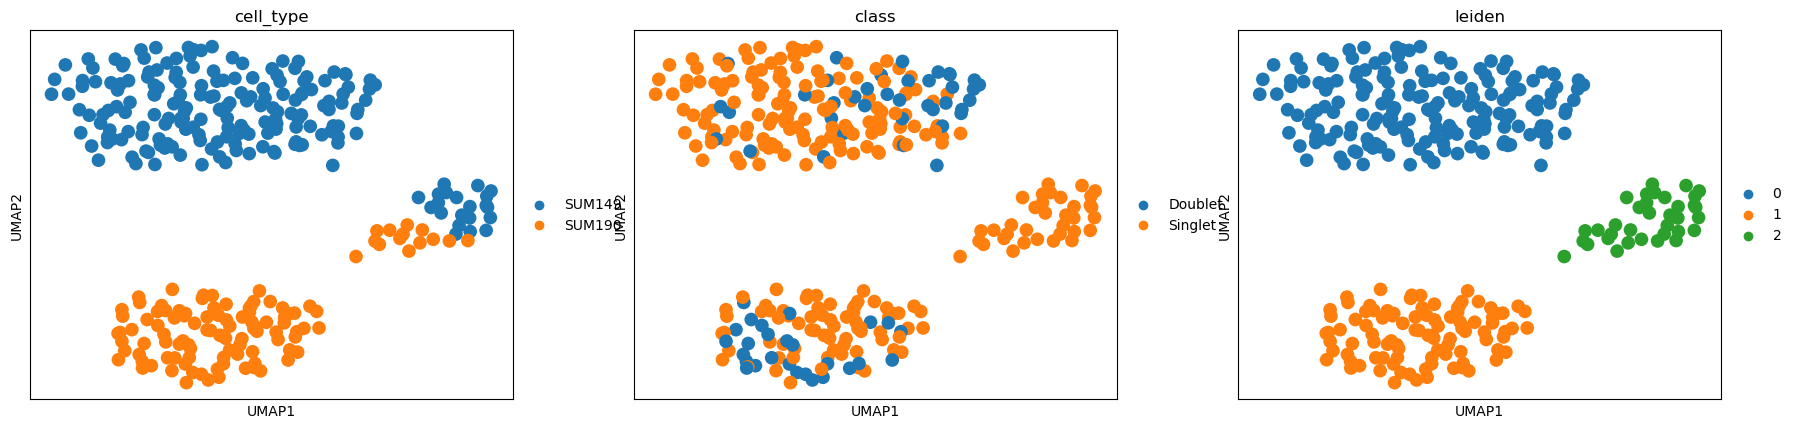

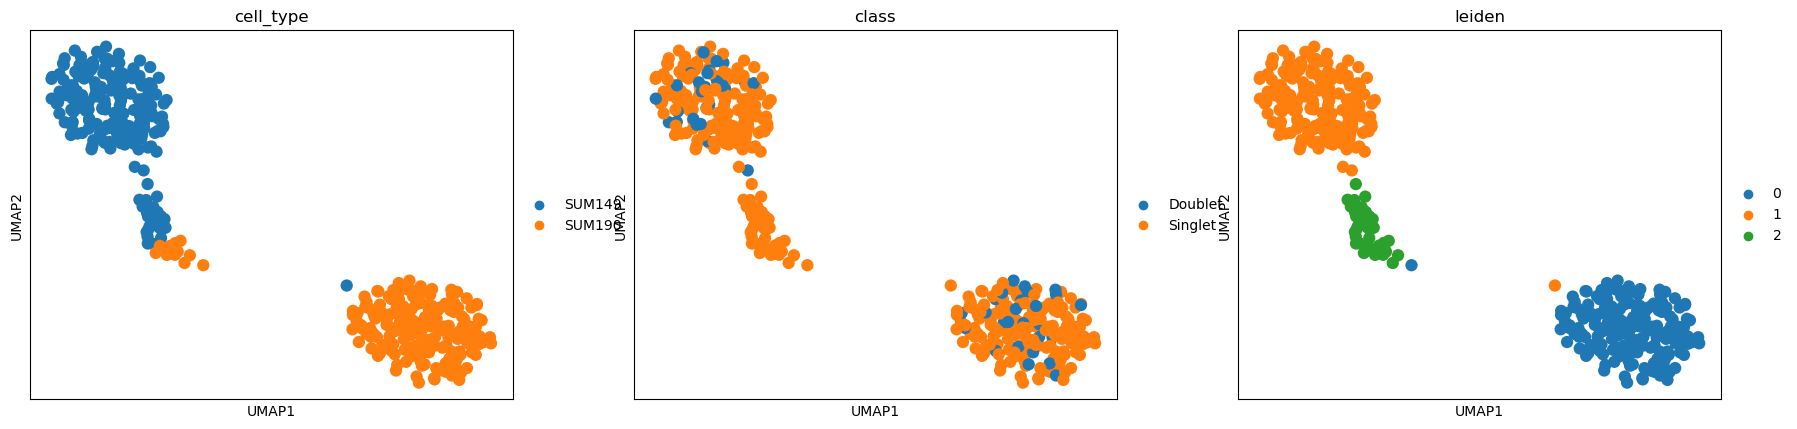

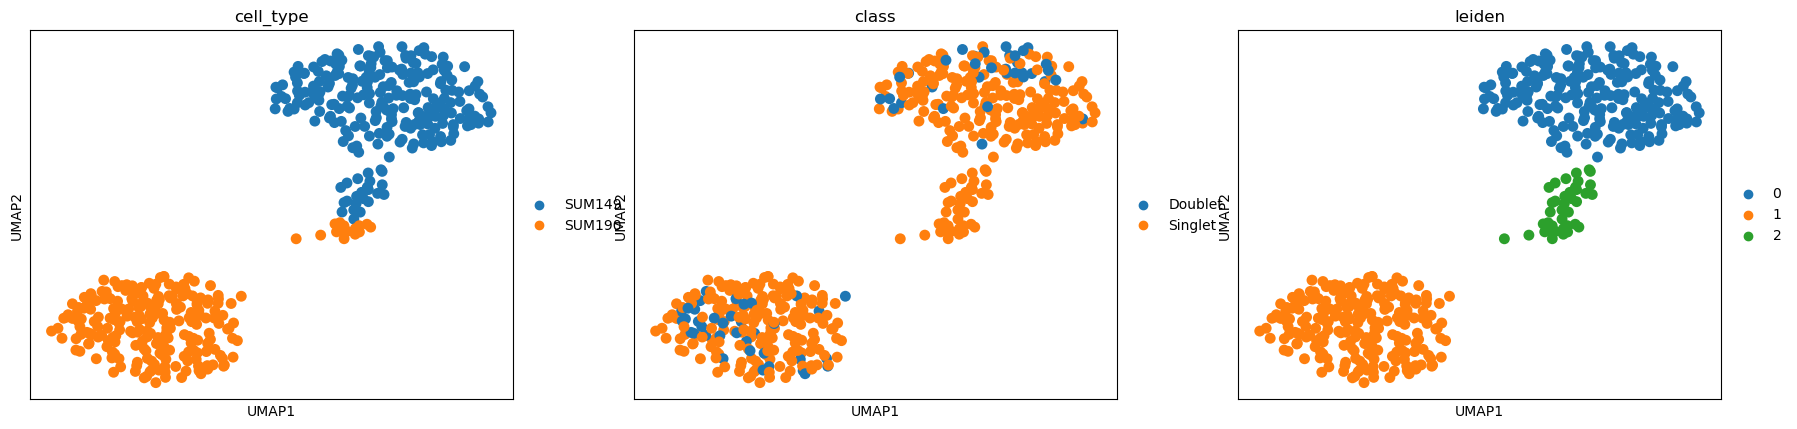

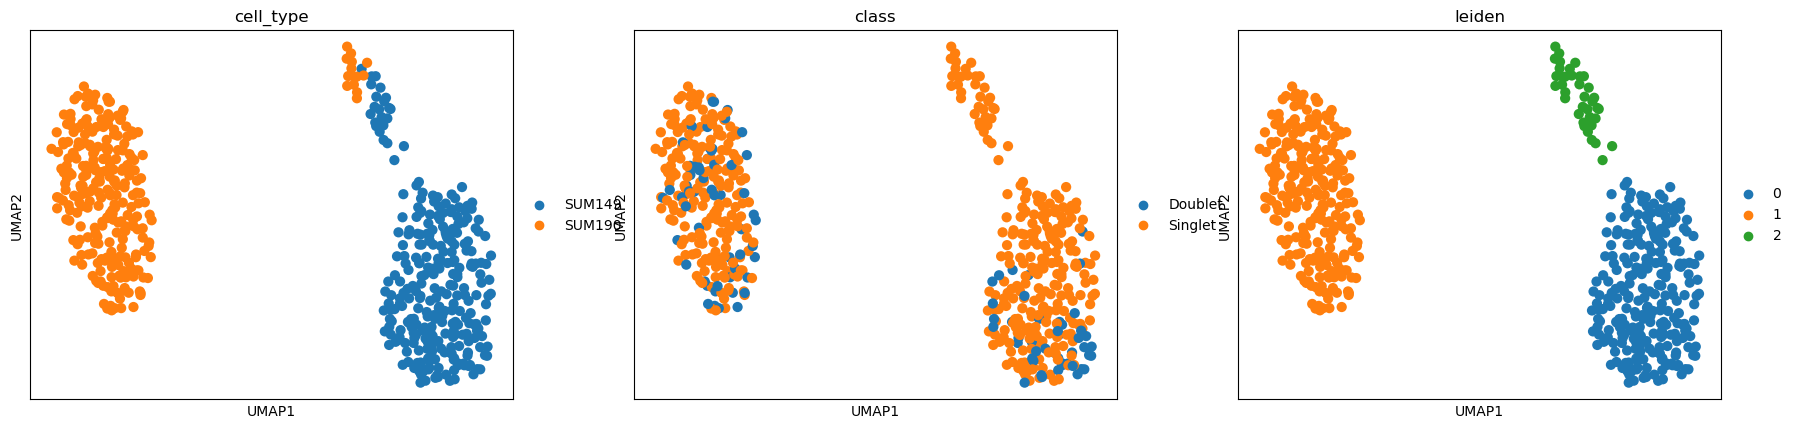

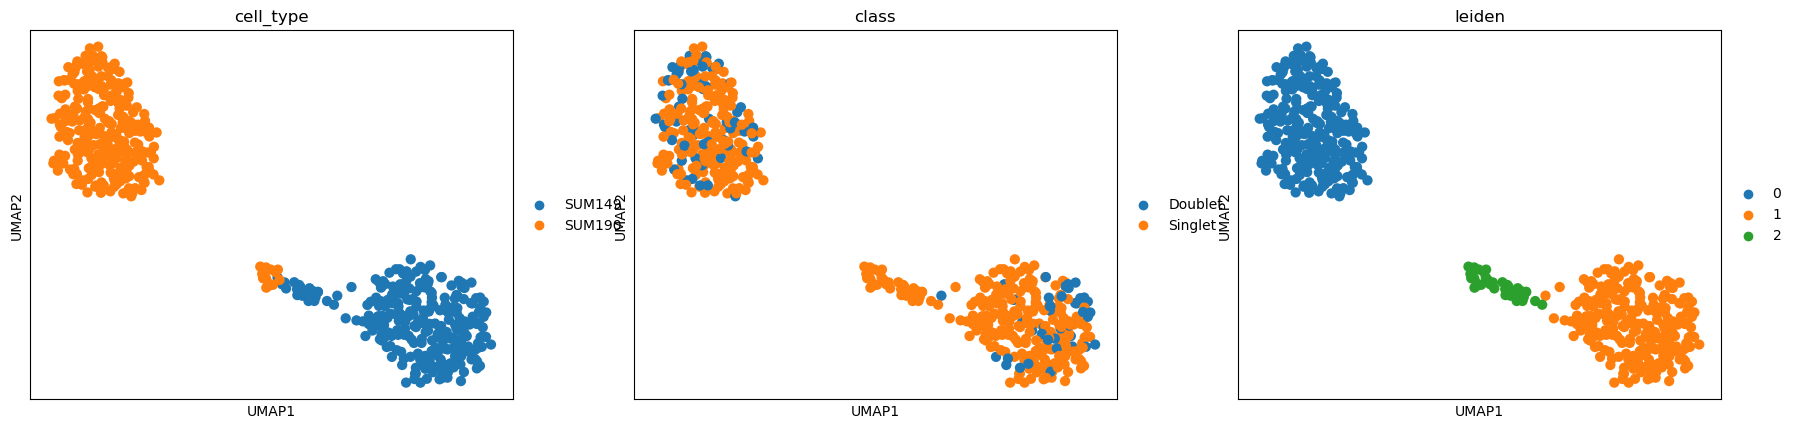

In [25]:
adata_img11 = adata_img11[adata_img11.obs["class"] != "Missing"]
umap_data_of_removal = pd.DataFrame()
umap_data_of_removal = pd.concat([
    umap_data_of_removal,
    get_umap_of_removal(adata_img11, None, "no removal"),
    get_umap_of_removal(adata_img11, "class", "Ground-truth"),
    get_umap_of_removal(adata_img11, "pred_image_class", "ImageDoubler"),
    get_umap_of_removal(adata_img11, "pred_doubletdetection", "DoubletDetection"),
    get_umap_of_removal(adata_img11, "pred_scrublet", "Scrublet"),
    get_umap_of_removal(adata_img11, "pred_solo", "Solo"),
    get_umap_of_removal(adata_img11, "pred_scds", "scds"),
    get_umap_of_removal(adata_img11, "pred_scDblFinder", "scDblFinder"),
    get_umap_of_removal(adata_img11, "pred_doubletfinder", "DoubletFinder"),
], ignore_index=True)
umap_data_of_removal.to_csv("Figure5/umap_data_removal_img11_noMissing.csv", index=False)

In [22]:
cluster_acc = []
for method in np.unique(umap_data_of_removal["detectiont_method"]):
    cluster_acc.append(
        [
            method,
            adjusted_mutual_info_score(
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "cell_type"],
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "leiden"],
            ),
            adjusted_rand_score(
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "cell_type"],
                umap_data_of_removal.loc[umap_data_of_removal["detectiont_method"] == method, "leiden"],
            ),
        ]
    )
cluster_acc = pd.DataFrame(cluster_acc, columns=["method", "AMI", "RI"])
cluster_acc.to_csv("Figure5/cluster_acc_img11_noMissing.csv", index=False)

#### Test the tSNE

In [83]:
import sys; sys.path.append('./FIt-SNE/')
from fast_tsne import fast_tsne
from sklearn.decomposition import PCA

In [90]:
adata = sc.read_h5ad("./expression/results/image-based/adata_img11_wPreds.h5ad")
# adata = adata[adata.obs["class"].notnull(), ]
sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor="seurat_v3")
librarySize = adata.X.sum(axis=1)
adata = adata[:, adata.var.highly_variable]
CPM = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
logCPM = np.log2(CPM + 1)
pca = PCA(n_components=50, svd_solver='full').fit(logCPM)
flipSigns = np.sum(pca.components_, axis=1) < 0
X = pca.transform(logCPM)
X[:, flipSigns] *= -1

/local/disk1/dengkw/anaconda3/envs/scrna/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [91]:
pca.explained_variance_ratio_.cumsum()

array([0.11016217, 0.18497372, 0.19555784, 0.20442552, 0.21217535,
       0.21864003, 0.22472561, 0.22973728, 0.23454374, 0.2387172 ,
       0.2425891 , 0.2460538 , 0.2494889 , 0.25281338, 0.25605144,
       0.2591661 , 0.26224746, 0.26530276, 0.26831313, 0.27125128,
       0.27414738, 0.27698636, 0.2798147 , 0.28259124, 0.28535832,
       0.2881072 , 0.29082204, 0.29351446, 0.2961804 , 0.29884465,
       0.30149649, 0.30413897, 0.30673674, 0.30931949, 0.31189885,
       0.31446613, 0.31702416, 0.31955466, 0.32206744, 0.32457241,
       0.32707201, 0.32955277, 0.3320217 , 0.33447953, 0.33692445,
       0.33935135, 0.34175901, 0.34415612, 0.34653768, 0.34891285])

=============== t-SNE v1.2.1 ===============
fast_tsne data_path: data.dat
fast_tsne result_path: result.dat
fast_tsne nthreads: 40
Read the following parameters:
	 n 820 by d 50 dataset, theta 0.500000,
	 perplexity 0.000000, no_dims 2, max_iter 750,
	 stop_lying_iter 250, mom_switch_iter 250,
	 momentum 0.500000, final_momentum 0.800000,
	 learning_rate 68.333333, max_step_norm 5.000000,
	 K -1, sigma -1.000000, nbody_algo 2,
	 knn_algo 1, early_exag_coeff 12.000000,
	 no_momentum_during_exag 0, n_trees 50, search_k 4500,
	 start_late_exag_iter -1, late_exag_coeff -1.000000
	 nterms 3, interval_per_integer 1.000000, min_num_intervals 50, t-dist df 1.000000
Read the 820 x 50 data matrix successfully. X[0,0] = -29.311794
Read the list of perplexities: 30.000000 8.000000 
Read the initialization successfully.
Will use momentum during exaggeration phase
Computing input similarities...
Using perplexity, so normalizing input data (to prevent numerical problems)
Using perplexity, not the ma

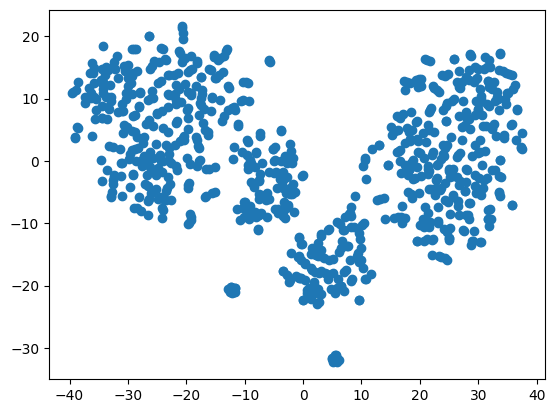

In [92]:
pcaInit = X[:,:2] / np.std(X[:,0]) * 0.0001
tsne_ours = fast_tsne(X, initialization = pcaInit,
                      learning_rate = X.shape[0]/12,
                      perplexity_list = [30, int(X.shape[0]/100)])
plt.plot(tsne_ours[:,0], tsne_ours[:,1], 'o')

#### The extra data

=============== t-SNE v1.2.1 ===============
fast_tsne data_path: data.dat
fast_tsne result_path: result.dat
fast_tsne nthreads: 40
Read the following parameters:
	 n 800 by d 50 dataset, theta 0.500000,
	 perplexity 0.000000, no_dims 2, max_iter 750,
	 stop_lying_iter 250, mom_switch_iter 250,
	 momentum 0.500000, final_momentum 0.800000,
	 learning_rate 66.666667, max_step_norm 5.000000,
	 K -1, sigma -1.000000, nbody_algo 2,
	 knn_algo 1, early_exag_coeff 12.000000,
	 no_momentum_during_exag 0, n_trees 50, search_k 4500,
	 start_late_exag_iter -1, late_exag_coeff -1.000000
	 nterms 3, interval_per_integer 1.000000, min_num_intervals 50, t-dist df 1.000000
Read the 800 x 50 data matrix successfully. X[0,0] = -11.071713
Read the list of perplexities: 30.000000 8.000000 
Read the initialization successfully.
Will use momentum during exaggeration phase
Computing input similarities...
Using perplexity, so normalizing input data (to prevent numerical problems)
Using perplexity, not the ma

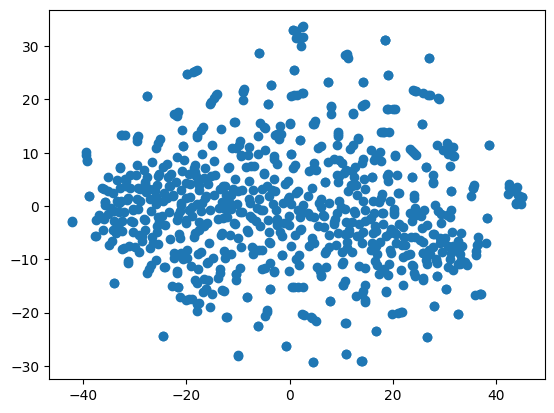

In [47]:
adata = sc.read_csv("expression/results/counts/raw_counts_imgExtra.txt", delimiter="\t").T
sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor="seurat_v3")
librarySize = adata.X.sum(axis=1)
adata = adata[:, adata.var.highly_variable]
CPM = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
logCPM = np.log2(CPM + 1)
pca = PCA(n_components=50, svd_solver='full').fit(logCPM)
flipSigns = np.sum(pca.components_, axis=1) < 0
X = pca.transform(logCPM)
X[:, flipSigns] *= -1

pcaInit = X[:,:2] / np.std(X[:,0]) * 0.0001
tsne_ours = fast_tsne(X, initialization = pcaInit,
                      learning_rate = X.shape[0]/12,
                      perplexity_list = [30, int(X.shape[0]/100)])


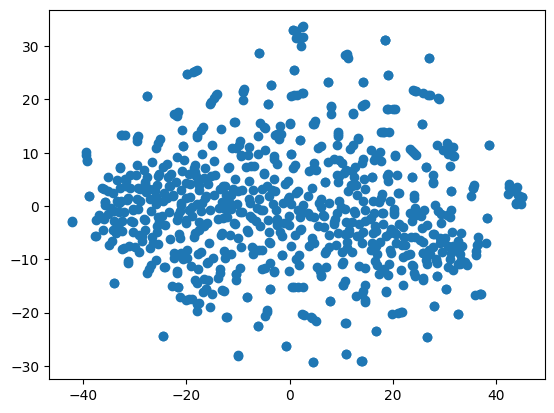

In [48]:
plt.plot(tsne_ours[:,0], tsne_ours[:,1], 'o', color = )

In [ ]:
# adata = adata[adata.obs["pred_image_class"].notnull(), ]
adata = adata[adata.obs["class"].notnull(), ]
librarySize = adata.X.sum(axis=1)
adata.X = adata.to_df().div(librarySize, axis='rows') * 1e+6 # CPM
adata.X = np.log2(adata.X + 1)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='full')
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata)